In [1]:
#pip install --upgrade --force-reinstall matplotlib

In [1]:
import pandas as pd
import numpy as np
import json
import re

In [2]:
import matplotlib as plt

In [3]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

#### Učitavanje podataka

In [4]:
data_attrition=pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [5]:
data_attrition

Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
0                    1          2  Life Sciences              1   
1                    8          1  Life Sciences              1   
2                    2          2          Other              1   
3                    3          4  Life Sciences              1   
4                    2          1        Medical              1   
...                ...        ...            ...            ...   
1465                23          2        Medical              1   
1466                 6          1        Medical              1   
1467                 4          3  Life Sciences              1   
1468                 2          3        Medical              1   
1469                 8          3        Medical              1   

      EmployeeNumber  ...  RelationshipSatisfaction StandardHours  \
0                  1  ...                         1            80   
1                  2  ...                         4            80   
2                  4  ...                         2            80   
3                  5  ...                         3            80   
4                  7  ...                         4            80   
...              ...  ...                       ...           ...   
1465            2061  ...                         3            80   
1466            2062  ...                         1            80   
1467            2064  ...                         2            80   
1468            2065  ...                         4            80   
1469            2068  ...                         1            80   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                    0                  8                      0   
1                    1                 10                      3   
2                    0                  7                      3   
3                    0                  8                      3   
4                    1                  6                      3   
...                ...                ...                    ...   
1465                 1                 17                      3   
1466                 1                  9                      5   
1467                 1                  6                      0   
1468                 0                 17                      3   
1469                 0                  6                      3   

     WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
0                  1               6                  4   
1                  3              10                  7   
2                  3               0                  0   
3                  3               8                  7   
4                  3               2                  2   
...              ...             ...                ...   
1465               3               5                  2   
1466               3               7                  7   
1467               3               6                  2   
1468               2               9    

#### Proveravanje null vrednosti u skupu podataka

In [6]:
data_attrition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [7]:
##### Proveravamo da li nam se u skupu podataka 
maska = data_attrition.isnull() | (data_attrition == '') | (data_attrition == 'None') | (data_attrition == ' ')

In [8]:
broj_null_vrednosti = maska.sum()
print(broj_null_vrednosti)

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [9]:
### Provera duplikata je takodje jedna od tehnika koje su neophodne u generisanju i preprocesiranju modela mašinskog učenja
## Nekada se radi svesno oversemplovanje ili undersamplovanje skupa podataka za treniranje medjutim u ovom slučaju je
# bolje na početku proveriti i uveriti se da li u samom startu postoje vrednosti koje su duplirane
### 

In [10]:
podaci_duplirani= data_attrition.duplicated()

In [11]:
# SADA DA VIDIMO DA LI SU PODACI DUPLIRANI
data_attrition[podaci_duplirani]

Empty DataFrame
Columns: [Age, Attrition, BusinessTravel, DailyRate, Department, DistanceFromHome, Education, EducationField, EmployeeCount, EmployeeNumber, EnvironmentSatisfaction, Gender, HourlyRate, JobInvolvement, JobLevel, JobRole, JobSatisfaction, MaritalStatus, MonthlyIncome, MonthlyRate, NumCompaniesWorked, Over18, OverTime, PercentSalaryHike, PerformanceRating, RelationshipSatisfaction, StandardHours, StockOptionLevel, TotalWorkingYears, TrainingTimesLastYear, WorkLifeBalance, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager]
Index: []

[0 rows x 35 columns]

In [12]:
#-Podaci u početnom skupu podataka nisu duplirani i nalaze se normalno 

In [13]:
#### Provera unique vrednosti unutar kolona 
#### kako bi izbegle i izbrisale konstantne vrednosti u skupu podataka koje nisu korisne ili su neke informacije
### poput ID kolona koji nisu kasnije relevantne za analizu

In [14]:
data_attrition.shape

(1470, 35)

In [15]:
for kolona in data_attrition.columns:
    print(f"{kolona}: Ima jedinstvenih vrednosti {data_attrition[kolona].nunique()}")
    print("######################################################")

Age: Ima jedinstvenih vrednosti 43
######################################################
Attrition: Ima jedinstvenih vrednosti 2
######################################################
BusinessTravel: Ima jedinstvenih vrednosti 3
######################################################
DailyRate: Ima jedinstvenih vrednosti 886
######################################################
Department: Ima jedinstvenih vrednosti 3
######################################################
DistanceFromHome: Ima jedinstvenih vrednosti 29
######################################################
Education: Ima jedinstvenih vrednosti 5
######################################################
EducationField: Ima jedinstvenih vrednosti 6
######################################################
EmployeeCount: Ima jedinstvenih vrednosti 1
######################################################
EmployeeNumber: Ima jedinstvenih vrednosti 1470
######################################################
EnvironmentSatisfactio

In [16]:
for kolona in data_attrition.columns:
    if data_attrition[kolona].nunique()==1:
        print(f"{kolona}: Ima jednu jedinstvenu vrednosti {data_attrition[kolona].nunique()}")
        print("######################################################")
    elif data_attrition[kolona].nunique()==data_attrition.shape[0]:
        print(f"{kolona}: Ima sve različite vrednosti")
        print("######################################################")
        

EmployeeCount: Ima jednu jedinstvenu vrednosti 1
######################################################
EmployeeNumber: Ima sve različite vrednosti
######################################################
Over18: Ima jednu jedinstvenu vrednosti 1
######################################################
StandardHours: Ima jednu jedinstvenu vrednosti 1
######################################################


In [17]:
## pre nego što ove informacije budu iskorišćene za prečišćavanje skupa podataka možemo videti raspodelu

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'DailyRate'}>,
        <Axes: title={'center': 'DistanceFromHome'}>,
        <Axes: title={'center': 'Education'}>,
        <Axes: title={'center': 'EmployeeCount'}>],
       [<Axes: title={'center': 'EmployeeNumber'}>,
        <Axes: title={'center': 'EnvironmentSatisfaction'}>,
        <Axes: title={'center': 'HourlyRate'}>,
        <Axes: title={'center': 'JobInvolvement'}>,
        <Axes: title={'center': 'JobLevel'}>],
       [<Axes: title={'center': 'JobSatisfaction'}>,
        <Axes: title={'center': 'MonthlyIncome'}>,
        <Axes: title={'center': 'MonthlyRate'}>,
        <Axes: title={'center': 'NumCompaniesWorked'}>,
        <Axes: title={'center': 'PercentSalaryHike'}>],
       [<Axes: title={'center': 'PerformanceRating'}>,
        <Axes: title={'center': 'RelationshipSatisfaction'}>,
        <Axes: title={'center': 'StandardHours'}>,
        <Axes: title={'center': 'StockOptionLevel'}>,
        <Axe

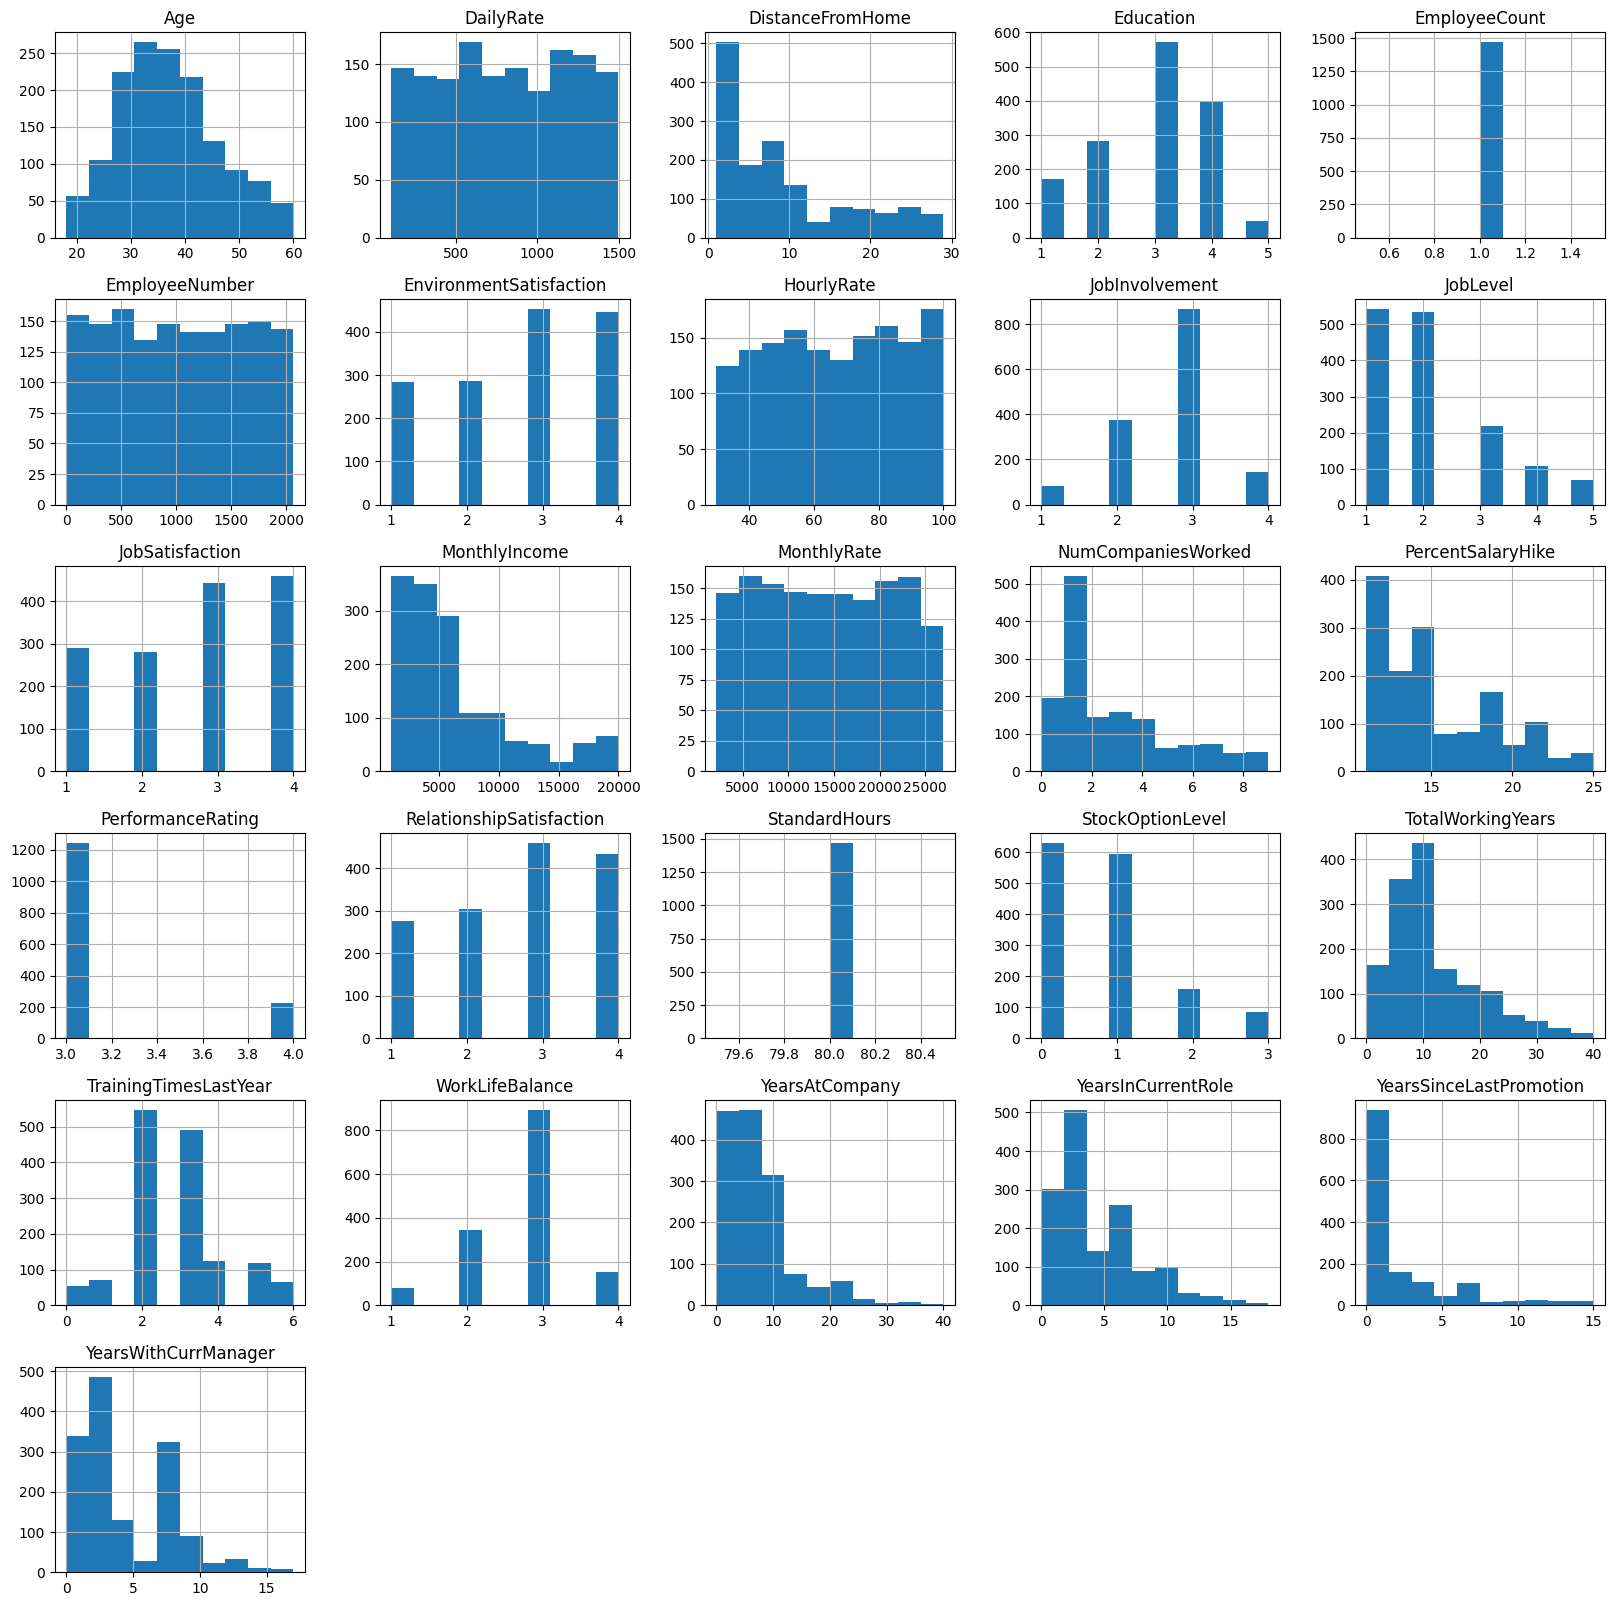

In [18]:
data_attrition.hist(figsize=(20,20))

In [19]:
# Na osnovu prikazanih histograma mogu se izneti sl. zaključci:
# - Dobra većina varijabli imaju distribuciju gde su krajevi raspodele izuzetno opterećeni,
## tako reći to su raspodele verovatnoća čiji repovi (krajevi) nisu eksponencijalno ograničeni. 
# To onda znači da oni opadaju sporije od ekponencijalne raspodele.
# u našem slučaju to bi značilo da većina varijabli ima raspodelu nakrivljenu na desno.
### Takođe vidimo da su neke varijable konstantne i da je moguće da se izbace i ne proučavaju dalje.

In [20]:
##### Ovde se zakljucuje da je neophodno ukoliti kolone koje imaju standardnu vrednost poput EmployeeCount, StandardHours Over18 a da
#varijabla EmployeeNumber predstavlja 

In [21]:
data_attrition.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis="columns", inplace=True                      )

In [22]:
data_attrition.head(5)

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0                 1          2  Life Sciences                        2   
1                 8          1  Life Sciences                        3   
2                 2          2          Other                        4   
3                 3          4  Life Sciences                        4   
4                 2          1        Medical                        1   

   Gender  ...  PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0  Female  ...                  3                         1                 0   
1    Male  ...                  4                         4                 1   
2    Male  ...                  3                         2                 0   
3  Female  ...                  3                         3                 0   
4    Male  ...                  3                         4                 1   

  TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                 8                      0               1               6   
1                10                      3               3              10   
2                 7                      3               3               0   
3                 8                      3               3               8   
4                 6                      3               3               2   

   YearsInCurrentRole  YearsSinceLastPromotion YearsWithCurrManager  
0                   4                        0                    5  
1                   7                        1                    7  
2                   0                        0                    0  
3                   7                        3                    0  
4                   2                        2                    2  

[5 rows x 31 columns]

In [23]:
### yes - 1; no -0
label_encoder_output = LabelEncoder()
data_attrition['Attrition'] = label_encoder_output.fit_transform(data_attrition['Attrition'])

c:\Users\andjelami\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\andjelami\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [24]:
data_attrition.head()

Age  Attrition     BusinessTravel  DailyRate              Department  \
0   41          1      Travel_Rarely       1102                   Sales   
1   49          0  Travel_Frequently        279  Research & Development   
2   37          1      Travel_Rarely       1373  Research & Development   
3   33          0  Travel_Frequently       1392  Research & Development   
4   27          0      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0                 1          2  Life Sciences                        2   
1                 8          1  Life Sciences                        3   
2                 2          2          Other                        4   
3                 3          4  Life Sciences                        4   
4                 2          1        Medical                        1   

   Gender  ...  PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0  Female  ...                  3                         1                 0   
1    Male  ...                  4                         4                 1   
2    Male  ...                  3                         2                 0   
3  Female  ...                  3                         3                 0   
4    Male  ...                  3                         4                 1   

  TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                 8                      0               1               6   
1                10                      3               3              10   
2                 7                      3               3               0   
3                 8                      3               3               8   
4                 6                      3               3               2   

   YearsInCurrentRole  YearsSinceLastPromotion YearsWithCurrManager  
0                   4                        0                    5  
1                   7                        1                    7  
2                   0                        0                    0  
3                   7                        3                    0  
4                   2                        2                    2  

[5 rows x 31 columns]

In [25]:
#data_attrition.head(5).to_csv("sample21.07.csv", index=False)

In [26]:
## sledeći korak je da se odradi uklanjanje outlier-a 
# - tu mogu da se koriste dve technike sada ćemo odraditi tehniku koriščenjem Z-score-a ali posto je takav vid uklanjanja oulier-a
## preporucljiv iskljucivo sa numerickim vrednostima potrebno je da se dobro razumeju sve kolone i shodno tome da se razdvoje
#### u odgovarajuće tipove podatka

In [27]:
data_attrition.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [28]:
numeričke_varijable=['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome',
                     'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears',
                    'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 
                    'YearsSinceLastPromotion', 'YearsWithCurrManager']

In [29]:
kategoričke_nominalne=['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus']

In [30]:
izlazna_varijabla=['Attrition']

In [31]:
kategoričke_binarne=['Gender', 'OverTime']

In [32]:
kategoričke_ordinalne=['Education', 'EnvironmentSatisfaction', 'JobInvolvement', 
                       'JobLevel', 'JobSatisfaction', 'PerformanceRating', 'RelationshipSatisfaction',
                       'StockOptionLevel', 'WorkLifeBalance']

In [33]:
sve_kategoricke=kategoričke_nominalne+kategoričke_binarne+kategoričke_ordinalne

In [34]:
###### Ispod je predstavljena tehnika otklanjanja outlier-a na osnovu z-scorea

In [35]:
data_attrition.shape

(1470, 31)

In [36]:
###
import numpy as np
from scipy import stats

In [37]:
z_skorovi = np.abs(stats.zscore(data_attrition[numeričke_varijable]))
data_attrition_outlier_cleaned = data_attrition[(z_skorovi < 3).all(axis=1)]

In [38]:
data_attrition_outlier_cleaned.shape

(1387, 31)

In [39]:
#### Sledeći korak jeste feature engineering u kome ćemo dodati odredjene izvedene varijable


In [40]:
# data_attrition_obogacen= data_attrition_outlier_cleaned.copy()

In [41]:
# data_attrition_obogacen['YearsAtCompany_ManagerRatio'] = data_attrition_obogacen['YearsAtCompany'] / (data_attrition_obogacen['YearsWithCurrManager'] + 1)
# data_attrition_obogacen['SalaryIncreasePerYear']=(data_attrition_obogacen['MonthlyIncome']-data_attrition_obogacen['DailyRate']*22) / data_attrition_obogacen['YearsAtCompany']

In [42]:
data_attrition_obogacen=data_attrition_outlier_cleaned

In [43]:
data_attrition_obogacen.shape

(1387, 31)

In [44]:
### sada se dodaju ove dve numericke varijable u numericke varijable i onda je potrebno da će biti odradjena 
##odgovarajuća konverzija kategorickih varijabli u numerickih kao i skaliranje numerickih varijabli

In [45]:
# numeričke_varijable.append('YearsAtCompany_ManagerRatio')
# numeričke_varijable.append('SalaryIncreasePerYear')

In [46]:
numeričke_varijable

['Age',
 'DailyRate',
 'DistanceFromHome',
 'HourlyRate',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [47]:
##### konverzija kategorickih u numericke

In [48]:
### prvo kategoricke ordinalne konvertujemo u ordinal varijable

In [49]:
import warnings

warnings.filterwarnings('ignore', category=FutureWarning)

In [50]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [51]:
from tqdm import tqdm

In [52]:
le = LabelEncoder()
l1 = []; l2 = []; text_categorical_features = []
print('Pretvaranje kategorickih varijabli ')
for i in tqdm(sve_kategoricke):
    if type(data_attrition_obogacen[i][0]) == str:
        text_categorical_features.append(i)
        data_attrition_obogacen[i] = le.fit_transform(data_attrition_obogacen[i])
        l1.append(list(data_attrition_obogacen[i].unique())); l2.append(list(le.inverse_transform(data_attrition_obogacen[i].unique())))
        print(i,' : ',data_attrition_obogacen[i].unique(),' = ',le.inverse_transform(data_attrition_obogacen[i].unique()))

Pretvaranje kategorickih varijabli 


  0%|          | 0/16 [00:00<?, ?it/s]C:\Users\andjelami\AppData\Local\Temp\ipykernel_28652\2032680336.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_attrition_obogacen[i] = le.fit_transform(data_attrition_obogacen[i])
C:\Users\andjelami\AppData\Local\Temp\ipykernel_28652\2032680336.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_attrition_obogacen[i] = le.fit_transform(data_attrition_obogacen[i])
C:\Users\andjelami\AppData\Local\Temp\ipykernel_28652\2032680336.py:7: SettingWithCopyWarnin

BusinessTravel  :  [2 1 0]  =  ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department  :  [2 1 0]  =  ['Sales' 'Research & Development' 'Human Resources']
EducationField  :  [1 4 3 2 5 0]  =  ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
JobRole  :  [7 6 2 4 0 3 8 5 1]  =  ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
MaritalStatus  :  [2 1 0]  =  ['Single' 'Married' 'Divorced']
Gender  :  [0 1]  =  ['Female' 'Male']
OverTime  :  [1 0]  =  ['Yes' 'No']


In [53]:
# tf1 = {}
# for i in range(len(text_categorical_features)):
#     tf1[text_categorical_features[i]] = {}
#     for j,k in zip(l1[i],l2[i]):
#         tf1[text_categorical_features[i]][j] = k

In [54]:
# label_encoders = {}
# for kolona in kategoričke_ordinalne:
#     le = LabelEncoder()
#     data_attrition_obogacen[kolona] = le.fit_transform(data_attrition_obogacen[kolona])
#     label_encoders[kolona] = le

In [55]:
# data_attrition_obogacen = pd.get_dummies(data_attrition_obogacen, columns= kategoričke_nominalne + kategoričke_binarne, drop_first=True)

In [56]:
#### Sada se koristi Standard Scaler za skaliranje numerickih varijabli

In [57]:
# ###3 ! ovo je zbog izvedenih varijabli 
# data_attrition_obogacen.replace([np.inf, -np.inf], np.nan, inplace=True)
# data_attrition_obogacen.dropna(inplace=True)

In [58]:
# data_attrition_obogacen.shape

In [59]:
data_attrition_obogacen.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [60]:
#data_attrition_obogacen.to_excel("data_attrition_obogacen.xlsx")

In [61]:
################## final kolone

In [62]:
data_attrition_obogacen.head(5)

Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0   41          1               2       1102           2                 1   
1   49          0               1        279           1                 8   
2   37          1               2       1373           1                 2   
3   33          0               1       1392           1                 3   
4   27          0               2        591           1                 2   

   Education  EducationField  EnvironmentSatisfaction  Gender  ...  \
0          2               1                        2       0  ...   
1          1               1                        3       1  ...   
2          2               4                        4       1  ...   
3          4               1                        4       0  ...   
4          1               3                        1       1  ...   

   PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0                  3                         1                 0   
1                  4                         4                 1   
2                  3                         2                 0   
3                  3                         3                 0   
4                  3                         4                 1   

   TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
0                  8                      0                1               6   
1                 10                      3                3              10   
2                  7                      3                3               0   
3                  8                      3                3               8   
4                  6                      3                3               2   

   YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                   4                        0                     5  
1                   7                        1                     7  
2                   0                        0                     0  
3                   7                        3                     0  
4                   2                        2                     2  

[5 rows x 31 columns]

In [63]:
data_attrition_obogacen.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1387 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1387 non-null   int64
 1   Attrition                 1387 non-null   int32
 2   BusinessTravel            1387 non-null   int32
 3   DailyRate                 1387 non-null   int64
 4   Department                1387 non-null   int32
 5   DistanceFromHome          1387 non-null   int64
 6   Education                 1387 non-null   int64
 7   EducationField            1387 non-null   int32
 8   EnvironmentSatisfaction   1387 non-null   int64
 9   Gender                    1387 non-null   int32
 10  HourlyRate                1387 non-null   int64
 11  JobInvolvement            1387 non-null   int64
 12  JobLevel                  1387 non-null   int64
 13  JobRole                   1387 non-null   int32
 14  JobSatisfaction           1387 non-null   int

In [64]:
import imblearn
from imblearn.pipeline import Pipeline
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [65]:
kolone_ulazne= list(data_attrition_obogacen.columns)
kolone_ulazne.remove('Attrition')

In [66]:
f1 = data_attrition_obogacen.loc[:, kolone_ulazne]
t1 = data_attrition_obogacen.loc[:, 'Attrition']

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
x_train, x_test, y_train, y_test = train_test_split(f1, t1, test_size=0.05, random_state=2)


In [69]:
over = SMOTE(sampling_strategy=0.85)

In [70]:
steps = [('over', over)]

In [71]:
pipeline = Pipeline(steps=steps)


In [72]:
x_train

Age  BusinessTravel  DailyRate  Department  DistanceFromHome  Education  \
202    34               1        878           1                10          4   
1199   36               2       1351           1                26          4   
17     22               0       1123           1                16          2   
152    53               2       1436           2                 6          2   
1190   32               2        977           1                 2          3   
...   ...             ...        ...         ...               ...        ...   
495    27               2       1420           2                 2          1   
318    27               2       1220           1                 5          3   
522    37               2       1225           1                10          2   
557    35               0       1225           1                 2          4   
1265   33               0        775           1                 4          3   

      EducationField  EnvironmentSatisfaction  Gender  HourlyRate  ...  \
202                3                        4       1          43  ...   
1199               1                        1       1          80  ...   
17                 3                        4       1          96  ...   
152                2                        2       1          34  ...   
1190               3                        4       1          45  ...   
...              ...                      ...     ...         ...  ...   
495                2                        3       1          85  ...   
318                1                        3       0          85  ...   
522                1                        4       1          80  ...   
557                1                        4       0          61  ...   
1265               5                        4       1          90  ...   

      PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
202                   3                         4                 1   
1199                  3                         2                 2   
17                    3                         2                 2   
152                   4                         4                 1   
1190                  3                         3                 2   
...                 ...                       ...               ...   
495                   3                         2                 1   
318                   3                         2                 0   
522                   3                         1                 0   
557                   3                         1                 1   
1265                  3                         4                 2   

      TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
202                   5                      4                4   
1199                 10                      2                2   
17                    1                      2                2   
152                  13                      3                1   
1190                 10                      4                2   
...                 ...                    ...              ...   
495                   5                      3                3   
318                   4                      2                2   
522                   4                      2                3   
557                  16                      2                4   
1265                 11                      2                2   

      YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
202                5                   3                        2   
1199               3                   2                        0   
17                 1                   0                        0   
152                7                   7                        4   
1190               9                   5                        1   
...              ...                 ...                      ...   
495

In [73]:
x_train_balansiran, y_train_balansiran = pipeline.fit_resample(x_train, y_train)

In [74]:
x_train = x_train_balansiran
y_train = y_train_balansiran

In [75]:
# from sklearn.model_selection import train_test_split

# x_train, x_test, y_train, y_test = train_test_split(f1, t1, test_size = 0.15, random_state = 2)

In [76]:
x_train_test = x_train.copy(deep = True)
x_train_test['Attrition'] = y_train

In [77]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif,chi2

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns


In [79]:
colors = ['#D8BFD8', '#FFFFFF']

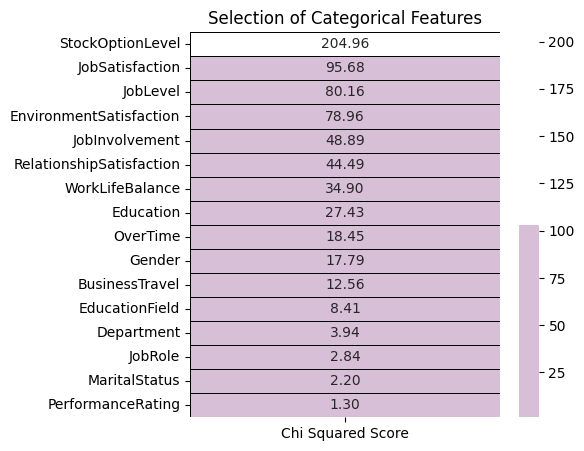

In [80]:
features = x_train.loc[:,sve_kategoricke]
target = pd.DataFrame(y_train)

best_features = SelectKBest(score_func = chi2,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['Chi Squared Score']) 

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'Chi Squared Score'),annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Categorical Features');

In [81]:
#### iz ovoga se vidi da je potrebno da se ukolone 
## Gender, EducationField, BusinessTravel, JobRole, Department,MaritalStatus, PerformanceRating, Education


In [82]:
from sklearn.feature_selection import SelectKBest, f_classif

In [83]:
features = x_train[numeričke_varijable]
target = pd.DataFrame(y_train)

In [84]:
best_features = SelectKBest(score_func=f_classif, k='all')
fit = best_features.fit(features, target)

c:\Users\andjelami\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [85]:
feature_scores = pd.DataFrame({
    'Feature': features.columns,
    'ANOVA Score': fit.scores_
})

In [86]:
sorted_feature_scores = feature_scores.sort_values(by='ANOVA Score', ascending=False)

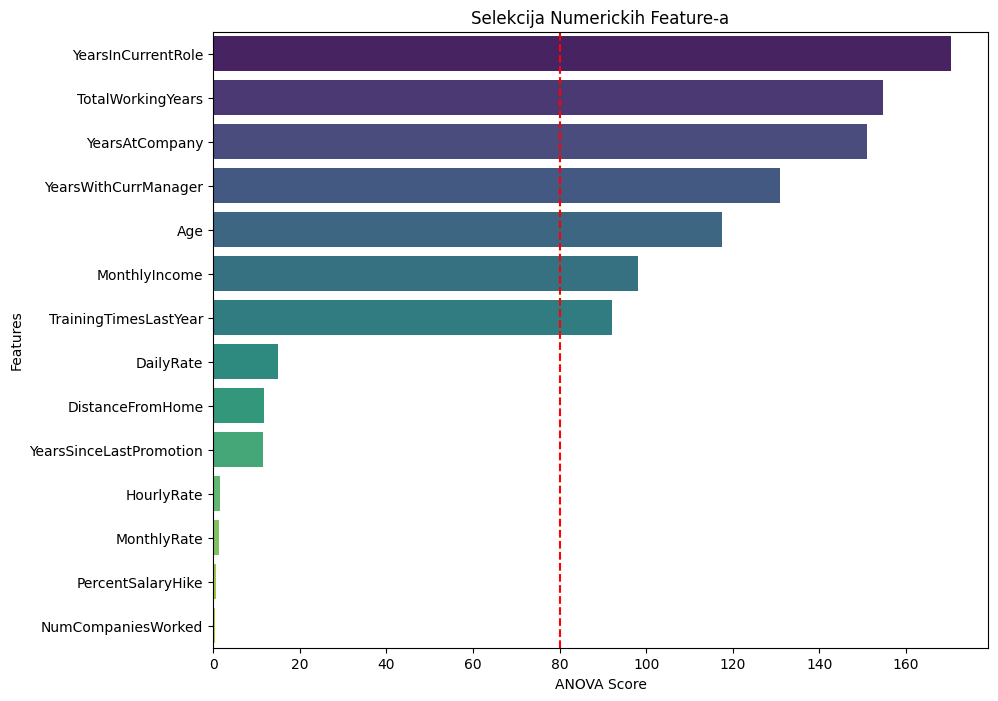

In [87]:
plt.figure(figsize=(10, 8))
sns.barplot(x='ANOVA Score', y='Feature', data=sorted_feature_scores, palette='viridis')
plt.axvline(x=80, color='red', linestyle='--')
plt.title('Selekcija Numerickih Feature-a')
plt.xlabel('ANOVA Score')
plt.ylabel('Features')
plt.show()

In [88]:
#### ovde na osnovu ANOVA testa mozemo da vidimo da od numerickih varijabli bilo bi dobro da izbacimo 
### YearsSinceLastPromation, DailyRate, DistanceFromHome, PercentSalaryHike, 
# MonthlyRate, HourlyRate, NumCompaniesWorked



In [89]:
x_train = x_train.drop(columns = ['MonthlyRate', 'HourlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 
                                  'YearsSinceLastPromotion', 'DistanceFromHome','DailyRate',
                                  'PerformanceRating', 'Department', 'JobRole', 'EducationField', 
                                  'BusinessTravel', 'MaritalStatus' ,'Gender'])

x_test = x_test.drop(columns = ['MonthlyRate', 'HourlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 
                                  'YearsSinceLastPromotion', 'DistanceFromHome','DailyRate',
                                  'PerformanceRating', 'Department', 'JobRole', 'EducationField', 
                                  'BusinessTravel', 'MaritalStatus' ,'Gender'])

In [90]:
x_train

Age  Education  EnvironmentSatisfaction  JobInvolvement  JobLevel  \
0      34          4                        4               3         1   
1      36          4                        1               3         2   
2      22          2                        4               4         1   
3      53          2                        2               3         2   
4      32          3                        4               3         2   
...   ...        ...                      ...             ...       ...   
2030   29          2                        3               3         1   
2031   33          2                        1               1         1   
2032   28          3                        2               1         1   
2033   29          3                        1               2         1   
2034   39          3                        1               2         3   

      JobSatisfaction  MonthlyIncome  OverTime  RelationshipSatisfaction  \
0                   3           3815         1                         4   
1                   3           5347         0                         2   
2                   4           2935         1                         2   
3                   3           2306         1                         4   
4                   2           5470         0                         3   
...               ...            ...       ...                       ...   
2030                2           2733         0                         3   
2031                2           4105         0                         2   
2032                1           2253         0                         3   
2033                2           3676         0                         2   
2034                3          10375         0                         3   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                    1                  5                      4   
1                    2                 10                      2   
2                    2                  1                      2   
3                    1                 13                      3   
4                    2                 10                      4   
...                ...                ...                    ...   
2030                 0                  3                      4   
2031                 1                 12                      2   
2032                 0                  7                      3   
2033                 0                  6                      4   
2034                 0                 15                      2   

      WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                   4               5                   3   
1                   2               3                   2   
2                   2               1                   0   
3                   1               7                   7   
4                   2               9                   5   
...               ...             ...                 ...   
2030                2               3                   2   
2031                3              10                   6   
2032                2               4                   4   
2033                1               0                   0   
2034                1              12                   2   

      YearsWithCurrManager  
0                        0  
1                        2  
2                        0  
3                        5  
4                        6  
...                    ...  
2030                     2  
2031                     7  
2032                     4  
2033                     0  
2034                     7  

[2035 rows x 16 columns]

In [91]:
############### NACIN skaliranja varijabli prvo cemo uraditi normalizaciju

In [92]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [93]:
min_max_scaler = MinMaxScaler()

In [94]:
standard_scaler = StandardScaler()

In [95]:
kolone_za_normalizaciju = ['MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsWithCurrManager']

In [96]:
kolone_za_standardizaciju = ['Age', 'Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'OverTime', 'RelationshipSatisfaction', 'StockOptionLevel', 'TrainingTimesLastYear', 'WorkLifeBalance']

In [97]:
for col in kolone_za_standardizaciju:
    x_train[col] = standard_scaler.fit_transform(x_train[[col]])
    x_test[col] = standard_scaler.transform(x_test[[col]])

In [98]:
for col in kolone_za_normalizaciju:
    x_train[col] = min_max_scaler.fit_transform(x_train[[col]])
    x_test[col] = min_max_scaler.transform(x_test[[col]])

### MODELIRANJE

In [99]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc



In [100]:
##### Posto ce se koristiti mnogi modeli kako se kod ne bi preklapao postojace funkcije koje rade 
# izggradnju modela prikaz kros validacijskog scora i prikaz evaluacionih metrika

In [101]:
import matplotlib.pyplot as plt

In [102]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, roc_curve, precision_score, recall_score, f1_score, precision_recall_curve

In [103]:
boje_za_grafikone= ['#8A2BE2','#D02090']

#### Modelovanje bez hiperparametrizacije

In [104]:
def prikazivanje_roc_auc_krive(model, x_test, y_test, y_pred_proba):
    #y_prob = model.predict_proba(x_test)[:,1]

    FPR,TPR, thresholds = roc_curve(y_test, y_pred_proba)

    roc_auc = auc(FPR,TPR)
    plt.figure()
    plt.plot(FPR, TPR, color='purple', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='violet', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC kriva')
    plt.legend(loc="lower right")
    plt.show()

In [105]:
def krosvalidacija_i_prikaz_roc_auc_krive(model, x_train, y_train, x_test, y_test, y_pred, y_pred_proba):
    ##### Krosvalidacija i pracenje krosvalidacionog score-a
    cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats=3, random_state=1)
    print("Krosvalidacioni scopre: ",'{0:.2%}'.format(cross_val_score(model,x_train,y_train,cv = cv,scoring = 'roc_auc').mean()))
    print("ROC_AUC Score : ",'{0:.2%}'.format(roc_auc_score(y_test,y_pred)))

    ############### SADA SE PRINTA ROC_AUC KRIVA
    prikazivanje_roc_auc_krive (model, x_test, y_test, y_pred_proba)

In [106]:
def evaluacija_modela_metrike(ime_modela,y_test, y_pred, y_pred_prob):

    print("#################################")
    print(f"Accuracy (Tačnost): {accuracy_score(y_test, y_pred)}")
    print("#################################")

    print(f"Precision (Preciznost): {precision_score(y_test, y_pred)}")
    print("#################################")

    print(f"Recall(odziv): {recall_score(y_test, y_pred)}")

    print("###############################")
    print(f"F1 Score: {f1_score(y_test, y_pred)}")
    print(f"ROC AUC: {roc_auc_score(y_test, y_pred_prob)}")
    print(f"Confusion Matrix (matrica konfuzije):\n{confusion_matrix(y_test, y_pred)}")
    print(f"Classification Report (klasifikacijski izvestaj):\n{classification_report(y_test, y_pred)}\n")

    ###### printing the confusion matrix
    plt.figure(figsize=(4, 4))
    matrica_konfuzije= confusion_matrix(y_test, y_pred)
    ## IZMENJENA MATRICA RADI INTUITIVNIJEG PRIKAZA
    konvertovana_matrica = np.fliplr(np.flipud(matrica_konfuzije))
    
    sns.heatmap(konvertovana_matrica, annot=True, fmt='d', cmap=boje_za_grafikone, xticklabels=['Attrition', 'No Attrition'], yticklabels=['Attrition', 'No Attrition'])
    plt.xlabel('Predvidjena')
    plt.ylabel('Stvarna')
    plt.title(f'Matrica konfuzuje za model {ime_modela}')
    plt.show()
    
    ##### izvestaj klasifikacije 
    print(classification_report(y_test,y_pred))

    precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
    plt.figure(figsize=(6, 4))
    plt.plot(recall, precision, label=f' Grafik za model{ime_modela}',  color='violet')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall kriva za  {ime_modela}')
    plt.legend()
    plt.show()

    

#### Model logisticke regresije

In [107]:
from sklearn.linear_model import LogisticRegression

########### MODEL LOGISTICKE REGRESIJE ###########
Krosvalidacioni scopre:  89.18%
ROC_AUC Score :  59.77%


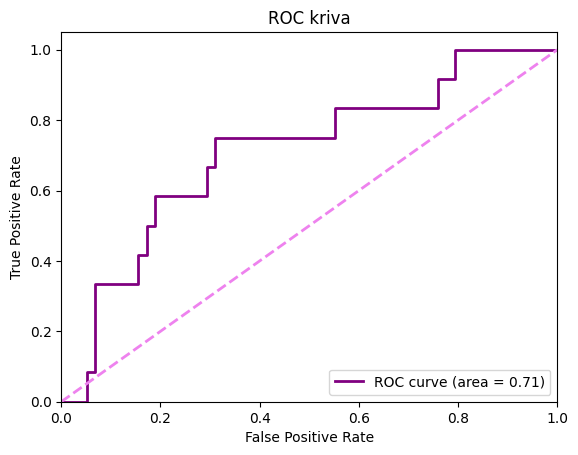

#################################
Accuracy (Tačnost): 0.7714285714285715
#################################
Precision (Preciznost): 0.3333333333333333
#################################
Recall(odziv): 0.3333333333333333
###############################
F1 Score: 0.3333333333333333
ROC AUC: 0.7097701149425287
Confusion Matrix (matrica konfuzije):
[[50  8]
 [ 8  4]]
Classification Report (klasifikacijski izvestaj):
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        58
           1       0.33      0.33      0.33        12

    accuracy                           0.77        70
   macro avg       0.60      0.60      0.60        70
weighted avg       0.77      0.77      0.77        70




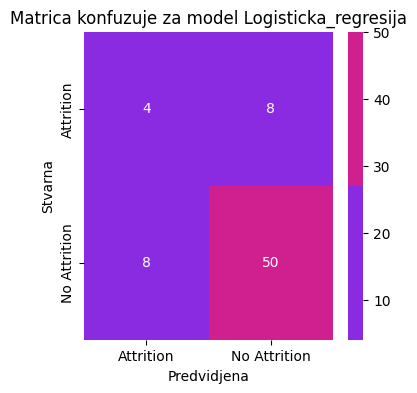

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        58
           1       0.33      0.33      0.33        12

    accuracy                           0.77        70
   macro avg       0.60      0.60      0.60        70
weighted avg       0.77      0.77      0.77        70



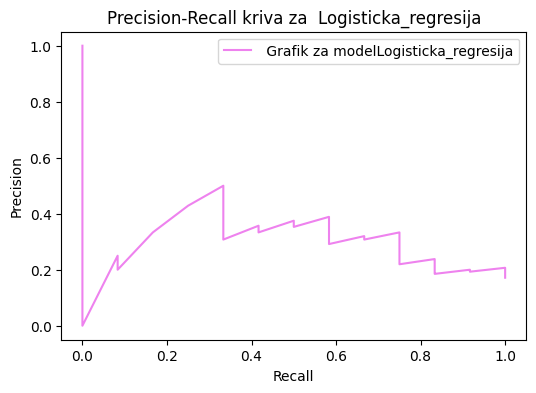

In [108]:
model_lr = LogisticRegression()
model_lr.fit(x_train, y_train)
y_pred_lr = model_lr.predict(x_test)
y_pred_prob_lr = model_lr.predict_proba(x_test)[:, 1]
print("########### MODEL LOGISTICKE REGRESIJE ###########")
krosvalidacija_i_prikaz_roc_auc_krive(model_lr, x_train,y_train,x_test, y_test,y_pred_lr, y_pred_prob_lr)

evaluacija_modela_metrike("Logisticka_regresija", y_test,y_pred_lr, y_pred_prob_lr)

In [109]:
from sklearn.tree import DecisionTreeClassifier

########### MODEL STABLA ODLUCIVANJA ###########
Krosvalidacioni scopre:  79.93%
ROC_AUC Score :  67.24%


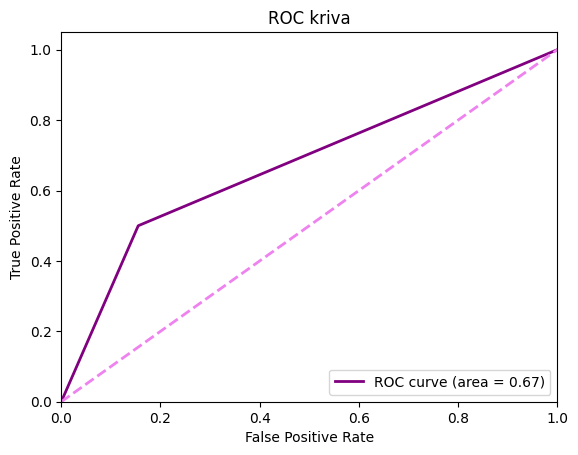

#################################
Accuracy (Tačnost): 0.7857142857142857
#################################
Precision (Preciznost): 0.4
#################################
Recall(odziv): 0.5
###############################
F1 Score: 0.4444444444444445
ROC AUC: 0.6724137931034483
Confusion Matrix (matrica konfuzije):
[[49  9]
 [ 6  6]]
Classification Report (klasifikacijski izvestaj):
              precision    recall  f1-score   support

           0       0.89      0.84      0.87        58
           1       0.40      0.50      0.44        12

    accuracy                           0.79        70
   macro avg       0.65      0.67      0.66        70
weighted avg       0.81      0.79      0.79        70




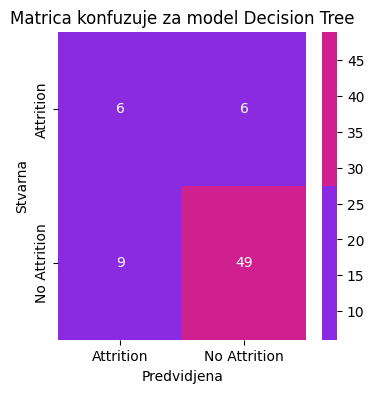

              precision    recall  f1-score   support

           0       0.89      0.84      0.87        58
           1       0.40      0.50      0.44        12

    accuracy                           0.79        70
   macro avg       0.65      0.67      0.66        70
weighted avg       0.81      0.79      0.79        70



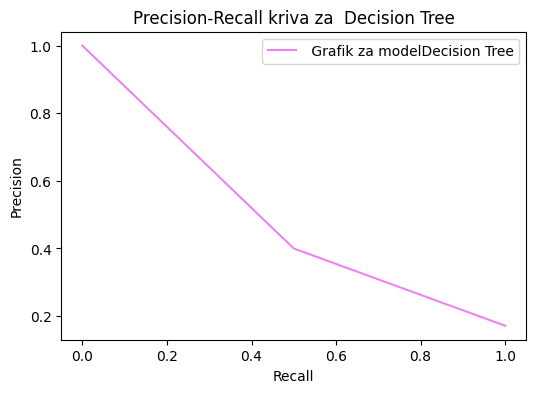

In [110]:
model_dt = DecisionTreeClassifier()
model_dt.fit(x_train, y_train)
y_pred_dt = model_dt.predict(x_test)
y_pred_prob_dt = model_dt.predict_proba(x_test)[:, 1]

print("########### MODEL STABLA ODLUCIVANJA ###########")
krosvalidacija_i_prikaz_roc_auc_krive(model_dt, x_train,y_train,x_test, y_test,y_pred_dt, y_pred_prob_dt)

evaluacija_modela_metrike("Decision Tree", y_test,y_pred_dt, y_pred_prob_dt)

In [111]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier


########### MODEL Random Forest###########
Krosvalidacioni scopre:  94.88%
ROC_AUC Score :  70.69%


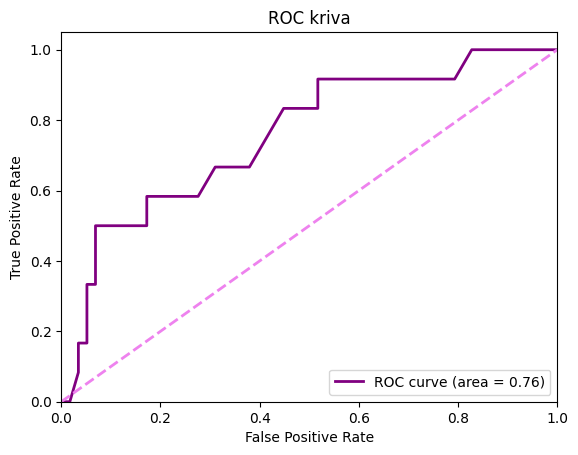

#################################
Accuracy (Tačnost): 0.8428571428571429
#################################
Precision (Preciznost): 0.5454545454545454
#################################
Recall(odziv): 0.5
###############################
F1 Score: 0.5217391304347826
ROC AUC: 0.7564655172413792
Confusion Matrix (matrica konfuzije):
[[53  5]
 [ 6  6]]
Classification Report (klasifikacijski izvestaj):
              precision    recall  f1-score   support

           0       0.90      0.91      0.91        58
           1       0.55      0.50      0.52        12

    accuracy                           0.84        70
   macro avg       0.72      0.71      0.71        70
weighted avg       0.84      0.84      0.84        70




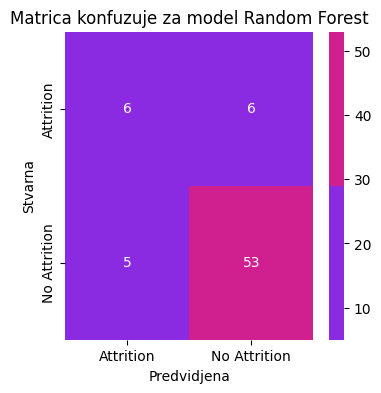

              precision    recall  f1-score   support

           0       0.90      0.91      0.91        58
           1       0.55      0.50      0.52        12

    accuracy                           0.84        70
   macro avg       0.72      0.71      0.71        70
weighted avg       0.84      0.84      0.84        70



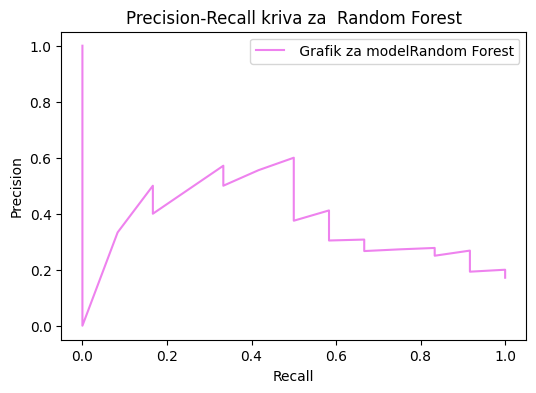

In [112]:
model_rf = RandomForestClassifier()
model_rf.fit(x_train, y_train)
y_pred_rf = model_rf.predict(x_test)
y_pred_prob_rf = model_rf.predict_proba(x_test)[:, 1]

print("########### MODEL Random Forest###########")
krosvalidacija_i_prikaz_roc_auc_krive(model_rf, x_train,y_train,x_test, y_test,y_pred_rf, y_pred_prob_rf)

evaluacija_modela_metrike("Random Forest", y_test,y_pred_rf, y_pred_prob_rf)

########### MODEL Gradient Boosting Classifier ###########
Krosvalidacioni scopre:  93.06%
ROC_AUC Score :  72.27%


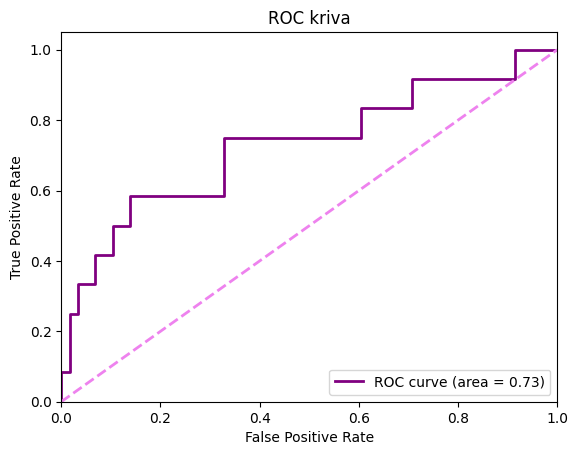

#################################
Accuracy (Tačnost): 0.8142857142857143
#################################
Precision (Preciznost): 0.4666666666666667
#################################
Recall(odziv): 0.5833333333333334
###############################
F1 Score: 0.5185185185185186
ROC AUC: 0.728448275862069
Confusion Matrix (matrica konfuzije):
[[50  8]
 [ 5  7]]
Classification Report (klasifikacijski izvestaj):
              precision    recall  f1-score   support

           0       0.91      0.86      0.88        58
           1       0.47      0.58      0.52        12

    accuracy                           0.81        70
   macro avg       0.69      0.72      0.70        70
weighted avg       0.83      0.81      0.82        70




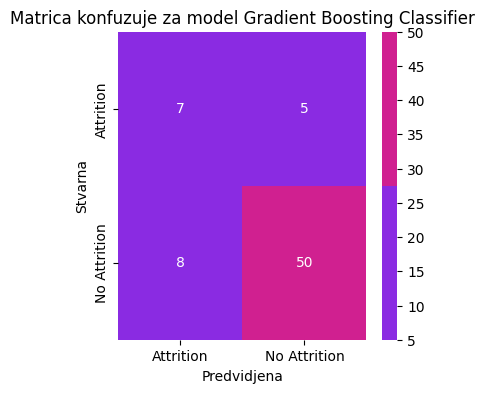

              precision    recall  f1-score   support

           0       0.91      0.86      0.88        58
           1       0.47      0.58      0.52        12

    accuracy                           0.81        70
   macro avg       0.69      0.72      0.70        70
weighted avg       0.83      0.81      0.82        70



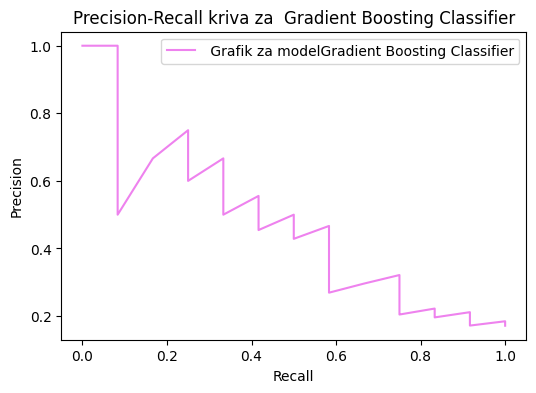

In [113]:
model_gb = GradientBoostingClassifier()
model_gb.fit(x_train, y_train)
y_pred_gb = model_gb.predict(x_test)
y_pred_prob_gb = model_gb.predict_proba(x_test)[:, 1]

print("########### MODEL Gradient Boosting Classifier ###########")
krosvalidacija_i_prikaz_roc_auc_krive(model_gb, x_train,y_train,x_test, y_test,y_pred_gb, y_pred_prob_gb)

evaluacija_modela_metrike("Gradient Boosting Classifier", y_test,y_pred_gb, y_pred_prob_gb)

########### MODEL Ada Boost Classifier ###########
Krosvalidacioni scopre:  90.98%
ROC_AUC Score :  68.10%


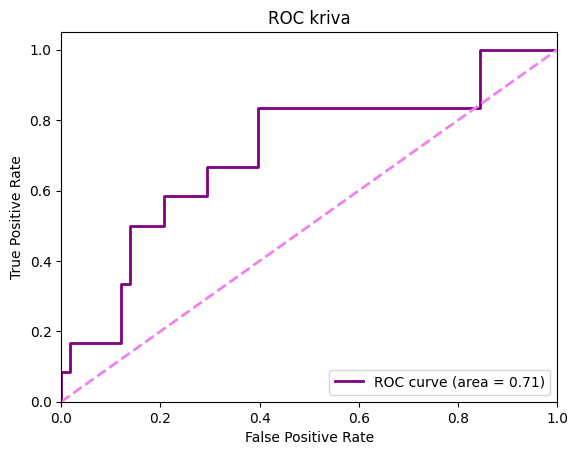

#################################
Accuracy (Tačnost): 0.8
#################################
Precision (Preciznost): 0.42857142857142855
#################################
Recall(odziv): 0.5
###############################
F1 Score: 0.4615384615384615
ROC AUC: 0.706896551724138
Confusion Matrix (matrica konfuzije):
[[50  8]
 [ 6  6]]
Classification Report (klasifikacijski izvestaj):
              precision    recall  f1-score   support

           0       0.89      0.86      0.88        58
           1       0.43      0.50      0.46        12

    accuracy                           0.80        70
   macro avg       0.66      0.68      0.67        70
weighted avg       0.81      0.80      0.81        70




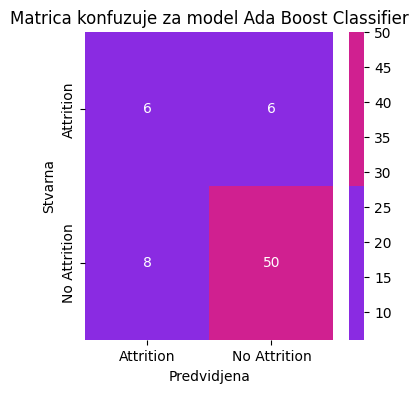

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        58
           1       0.43      0.50      0.46        12

    accuracy                           0.80        70
   macro avg       0.66      0.68      0.67        70
weighted avg       0.81      0.80      0.81        70



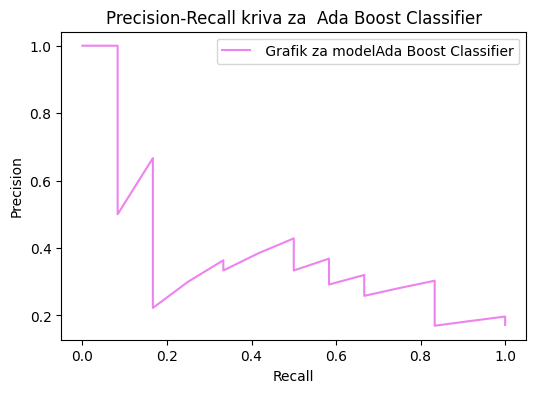

In [114]:
model_ab = AdaBoostClassifier()
model_ab.fit(x_train, y_train)
y_pred_ab = model_ab.predict(x_test)
y_pred_prob_ab = model_ab.predict_proba(x_test)[:, 1]

print("########### MODEL Ada Boost Classifier ###########")
krosvalidacija_i_prikaz_roc_auc_krive(model_ab, x_train,y_train,x_test, y_test,y_pred_ab, y_pred_prob_ab)

evaluacija_modela_metrike("Ada Boost Classifier", y_test,y_pred_ab, y_pred_prob_ab)

########### MODEL Bagging Classifier ###########
Krosvalidacioni scopre:  92.18%
ROC_AUC Score :  61.49%


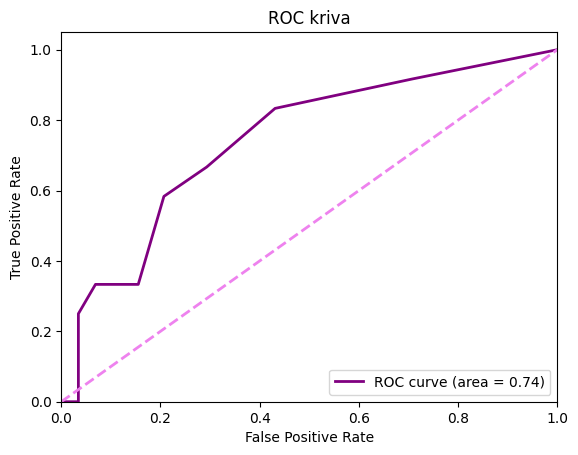

#################################
Accuracy (Tačnost): 0.8
#################################
Precision (Preciznost): 0.4
#################################
Recall(odziv): 0.3333333333333333
###############################
F1 Score: 0.3636363636363636
ROC AUC: 0.7420977011494252
Confusion Matrix (matrica konfuzije):
[[52  6]
 [ 8  4]]
Classification Report (klasifikacijski izvestaj):
              precision    recall  f1-score   support

           0       0.87      0.90      0.88        58
           1       0.40      0.33      0.36        12

    accuracy                           0.80        70
   macro avg       0.63      0.61      0.62        70
weighted avg       0.79      0.80      0.79        70




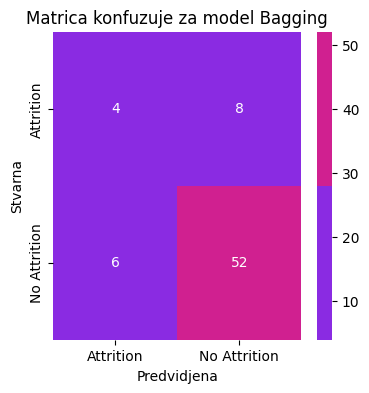

              precision    recall  f1-score   support

           0       0.87      0.90      0.88        58
           1       0.40      0.33      0.36        12

    accuracy                           0.80        70
   macro avg       0.63      0.61      0.62        70
weighted avg       0.79      0.80      0.79        70



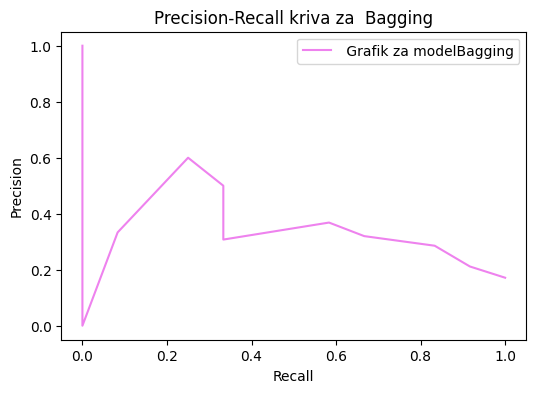

In [115]:
model_bg = BaggingClassifier()
model_bg.fit(x_train, y_train)
y_pred_bg = model_bg.predict(x_test)
y_pred_prob_bg = model_bg.predict_proba(x_test)[:, 1]

print("########### MODEL Bagging Classifier ###########")
krosvalidacija_i_prikaz_roc_auc_krive(model_bg, x_train,y_train,x_test, y_test,y_pred_bg, y_pred_prob_bg)

evaluacija_modela_metrike("Bagging", y_test,y_pred_bg, y_pred_prob_bg)

In [116]:
import xgboost as xgb
import lightgbm as lgb
import catboost as cb

########### MODEL XGB Classifier###########
Krosvalidacioni scopre:  94.95%
ROC_AUC Score :  68.97%


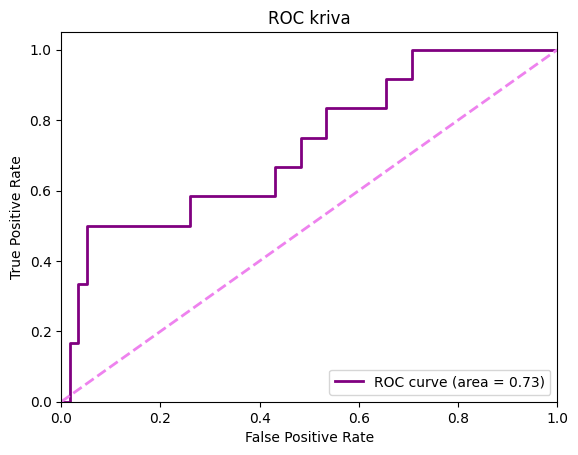

#################################
Accuracy (Tačnost): 0.8142857142857143
#################################
Precision (Preciznost): 0.46153846153846156
#################################
Recall(odziv): 0.5
###############################
F1 Score: 0.48000000000000004
ROC AUC: 0.7270114942528736
Confusion Matrix (matrica konfuzije):
[[51  7]
 [ 6  6]]
Classification Report (klasifikacijski izvestaj):
              precision    recall  f1-score   support

           0       0.89      0.88      0.89        58
           1       0.46      0.50      0.48        12

    accuracy                           0.81        70
   macro avg       0.68      0.69      0.68        70
weighted avg       0.82      0.81      0.82        70




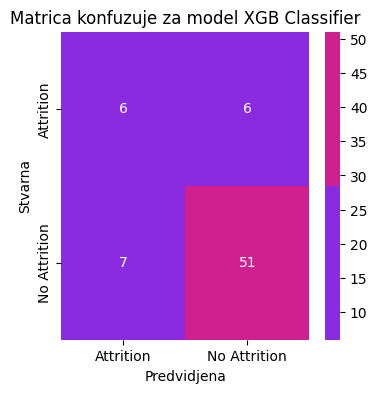

              precision    recall  f1-score   support

           0       0.89      0.88      0.89        58
           1       0.46      0.50      0.48        12

    accuracy                           0.81        70
   macro avg       0.68      0.69      0.68        70
weighted avg       0.82      0.81      0.82        70



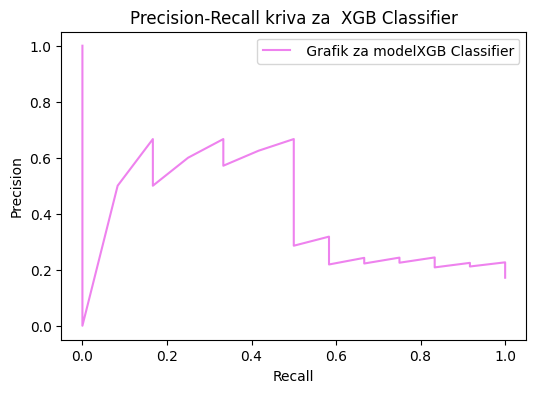

In [117]:
model_xgb = xgb.XGBClassifier()
model_xgb.fit(x_train, y_train)
y_pred_xgb = model_xgb.predict(x_test)
y_pred_prob_xgb = model_xgb.predict_proba(x_test)[:, 1]

print("########### MODEL XGB Classifier###########")
krosvalidacija_i_prikaz_roc_auc_krive(model_xgb, x_train,y_train,x_test, y_test,y_pred_xgb, y_pred_prob_xgb)

evaluacija_modela_metrike("XGB Classifier", y_test,y_pred_xgb, y_pred_prob_xgb)

[LightGBM] [Info] Number of positive: 935, number of negative: 1100
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000547 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 442
[LightGBM] [Info] Number of data points in the train set: 2035, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.459459 -> initscore=-0.162519
[LightGBM] [Info] Start training from score -0.162519
########### MODEL LGBM Classifier###########
[LightGBM] [Info] Number of positive: 841, number of negative: 990
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000073 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 442
[LightGBM] [Info] Number of data points in the train set: 1831, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=

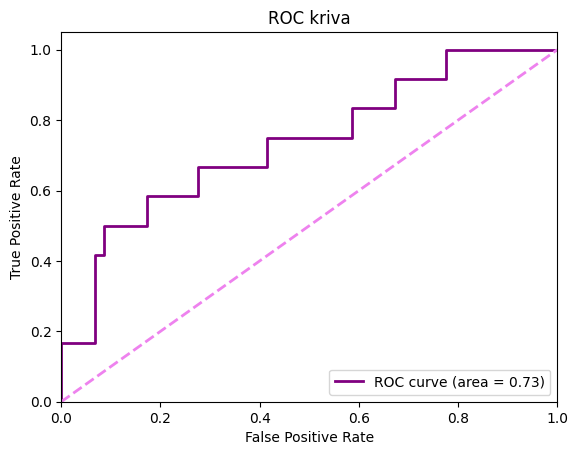

#################################
Accuracy (Tačnost): 0.8285714285714286
#################################
Precision (Preciznost): 0.5
#################################
Recall(odziv): 0.5
###############################
F1 Score: 0.5
ROC AUC: 0.7341954022988506
Confusion Matrix (matrica konfuzije):
[[52  6]
 [ 6  6]]
Classification Report (klasifikacijski izvestaj):
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        58
           1       0.50      0.50      0.50        12

    accuracy                           0.83        70
   macro avg       0.70      0.70      0.70        70
weighted avg       0.83      0.83      0.83        70




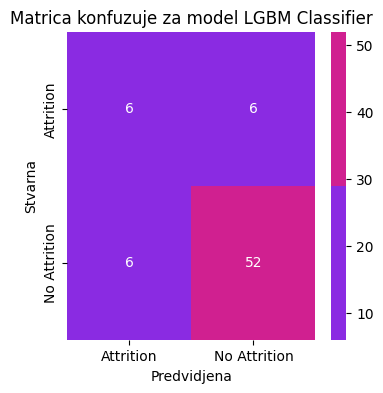

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        58
           1       0.50      0.50      0.50        12

    accuracy                           0.83        70
   macro avg       0.70      0.70      0.70        70
weighted avg       0.83      0.83      0.83        70



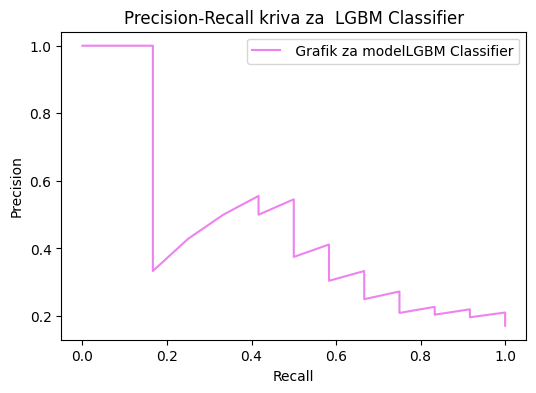

In [118]:
model_lgb = lgb.LGBMClassifier()
model_lgb.fit(x_train, y_train)
y_pred_lgb = model_lgb.predict(x_test)
y_pred_prob_lgb = model_lgb.predict_proba(x_test)[:, 1]

print("########### MODEL LGBM Classifier###########")
krosvalidacija_i_prikaz_roc_auc_krive(model_lgb, x_train,y_train,x_test, y_test,y_pred_lgb, y_pred_prob_lgb)

evaluacija_modela_metrike("LGBM Classifier", y_test,y_pred_lgb, y_pred_prob_lgb)

Learning rate set to 0.013954
0:	learn: 0.6867067	total: 144ms	remaining: 2m 23s
1:	learn: 0.6792118	total: 151ms	remaining: 1m 15s
2:	learn: 0.6729160	total: 157ms	remaining: 52.2s
3:	learn: 0.6661521	total: 162ms	remaining: 40.4s
4:	learn: 0.6604501	total: 167ms	remaining: 33.3s
5:	learn: 0.6541294	total: 171ms	remaining: 28.4s
6:	learn: 0.6489147	total: 175ms	remaining: 24.8s
7:	learn: 0.6431614	total: 179ms	remaining: 22.2s
8:	learn: 0.6372420	total: 186ms	remaining: 20.5s
9:	learn: 0.6314708	total: 191ms	remaining: 18.9s
10:	learn: 0.6257028	total: 197ms	remaining: 17.7s
11:	learn: 0.6210341	total: 202ms	remaining: 16.6s
12:	learn: 0.6156364	total: 206ms	remaining: 15.6s
13:	learn: 0.6107440	total: 210ms	remaining: 14.8s
14:	learn: 0.6059202	total: 217ms	remaining: 14.3s
15:	learn: 0.6009257	total: 222ms	remaining: 13.6s
16:	learn: 0.5957580	total: 226ms	remaining: 13.1s
17:	learn: 0.5914133	total: 231ms	remaining: 12.6s
18:	learn: 0.5872227	total: 235ms	remaining: 12.1s
19:	learn

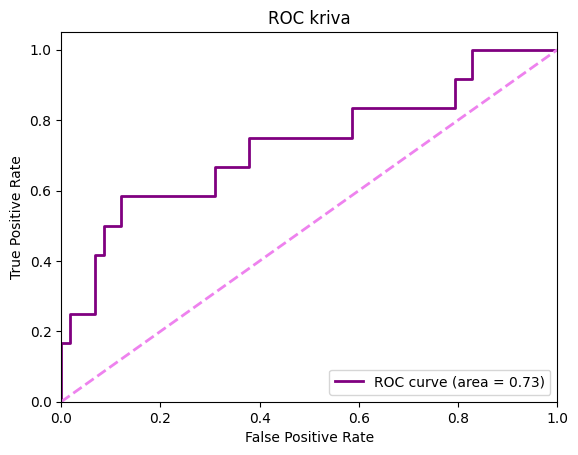

#################################
Accuracy (Tačnost): 0.8428571428571429
#################################
Precision (Preciznost): 0.5454545454545454
#################################
Recall(odziv): 0.5
###############################
F1 Score: 0.5217391304347826
ROC AUC: 0.7284482758620688
Confusion Matrix (matrica konfuzije):
[[53  5]
 [ 6  6]]
Classification Report (klasifikacijski izvestaj):
              precision    recall  f1-score   support

           0       0.90      0.91      0.91        58
           1       0.55      0.50      0.52        12

    accuracy                           0.84        70
   macro avg       0.72      0.71      0.71        70
weighted avg       0.84      0.84      0.84        70




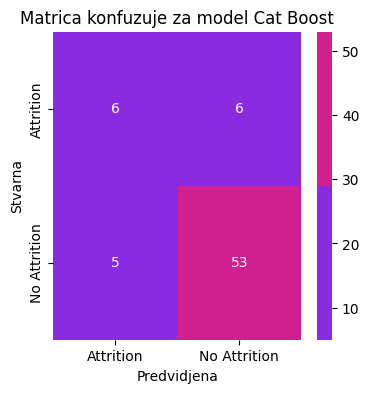

              precision    recall  f1-score   support

           0       0.90      0.91      0.91        58
           1       0.55      0.50      0.52        12

    accuracy                           0.84        70
   macro avg       0.72      0.71      0.71        70
weighted avg       0.84      0.84      0.84        70



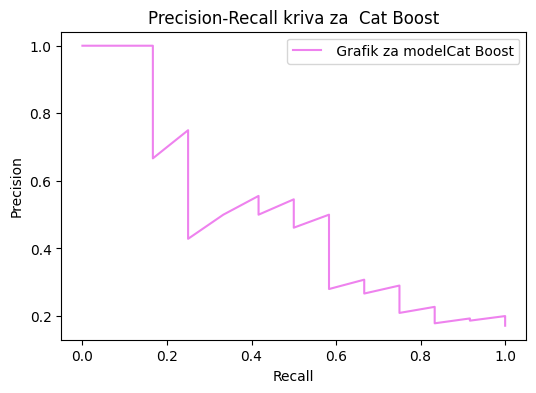

In [119]:
model_cb = cb.CatBoostClassifier()
model_cb.fit(x_train, y_train)
y_pred_cb = model_cb.predict(x_test)
y_pred_prob_cb = model_cb.predict_proba(x_test)[:, 1]

print("########### MODEL Cat Boost ###########")
krosvalidacija_i_prikaz_roc_auc_krive(model_cb, x_train,y_train,x_test, y_test,y_pred_cb, y_pred_prob_cb)

evaluacija_modela_metrike("Cat Boost", y_test,y_pred_cb, y_pred_prob_cb)

In [120]:
#### JOS VISE OSNOVNIH MODELA

In [121]:
from sklearn.naive_bayes import GaussianNB

########### MODEL Naive Bayes ###########
Krosvalidacioni scopre:  82.79%
ROC_AUC Score :  62.79%


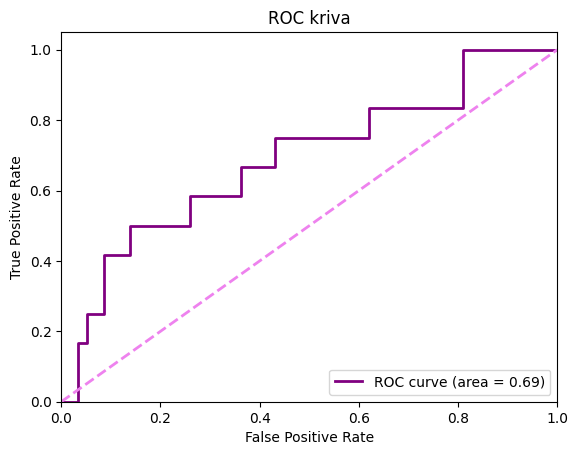

#################################
Accuracy (Tačnost): 0.6571428571428571
#################################
Precision (Preciznost): 0.2692307692307692
#################################
Recall(odziv): 0.5833333333333334
###############################
F1 Score: 0.3684210526315789
ROC AUC: 0.6896551724137931
Confusion Matrix (matrica konfuzije):
[[39 19]
 [ 5  7]]
Classification Report (klasifikacijski izvestaj):
              precision    recall  f1-score   support

           0       0.89      0.67      0.76        58
           1       0.27      0.58      0.37        12

    accuracy                           0.66        70
   macro avg       0.58      0.63      0.57        70
weighted avg       0.78      0.66      0.70        70




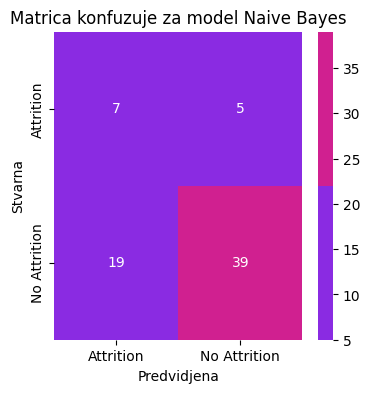

              precision    recall  f1-score   support

           0       0.89      0.67      0.76        58
           1       0.27      0.58      0.37        12

    accuracy                           0.66        70
   macro avg       0.58      0.63      0.57        70
weighted avg       0.78      0.66      0.70        70



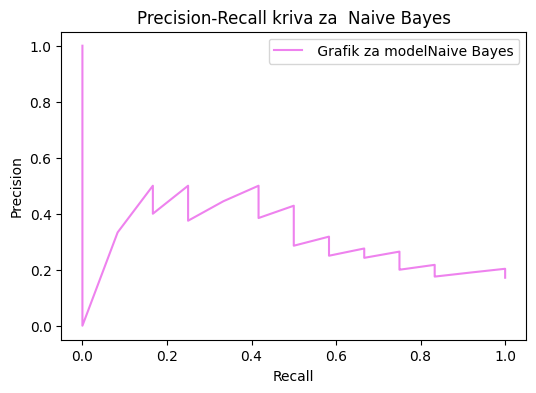

In [122]:
model_gnb = GaussianNB()
model_gnb.fit(x_train, y_train)
y_pred_gnb = model_gnb.predict(x_test)
y_pred_prob_gnb = model_gnb.predict_proba(x_test)[:, 1]

print("########### MODEL Naive Bayes ###########")
krosvalidacija_i_prikaz_roc_auc_krive(model_gnb, x_train,y_train,x_test, y_test,y_pred_gnb, y_pred_prob_gnb)

evaluacija_modela_metrike("Naive Bayes", y_test,y_pred_gnb, y_pred_prob_gnb)

In [123]:
from sklearn.svm import SVC

########### MODEL Support Vector Machine ###########
Krosvalidacioni scopre:  91.76%
ROC_AUC Score :  63.94%


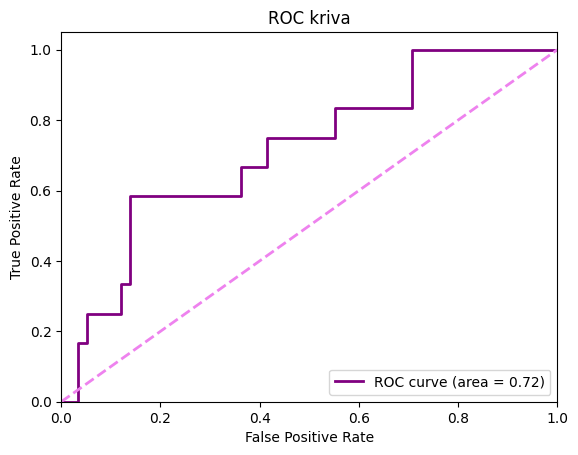

#################################
Accuracy (Tačnost): 0.7857142857142857
#################################
Precision (Preciznost): 0.38461538461538464
#################################
Recall(odziv): 0.4166666666666667
###############################
F1 Score: 0.4
ROC AUC: 0.7169540229885057
Confusion Matrix (matrica konfuzije):
[[50  8]
 [ 7  5]]
Classification Report (klasifikacijski izvestaj):
              precision    recall  f1-score   support

           0       0.88      0.86      0.87        58
           1       0.38      0.42      0.40        12

    accuracy                           0.79        70
   macro avg       0.63      0.64      0.63        70
weighted avg       0.79      0.79      0.79        70




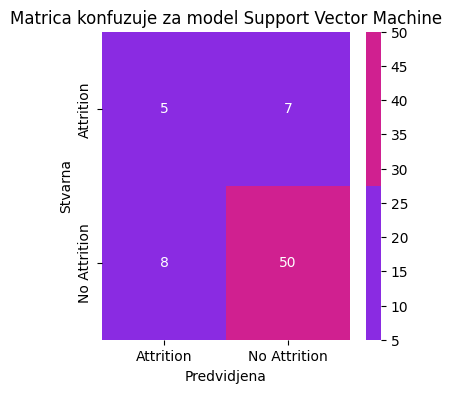

              precision    recall  f1-score   support

           0       0.88      0.86      0.87        58
           1       0.38      0.42      0.40        12

    accuracy                           0.79        70
   macro avg       0.63      0.64      0.63        70
weighted avg       0.79      0.79      0.79        70



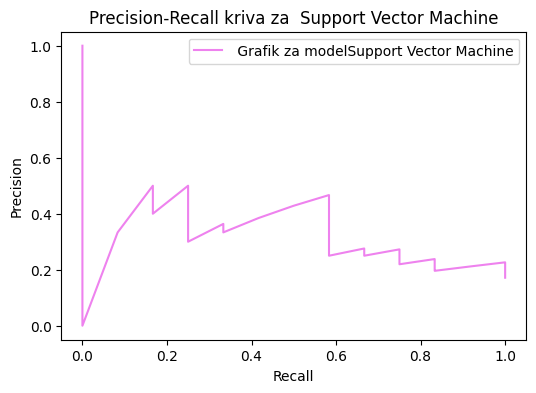

In [124]:
model_svc = SVC(probability=True)
model_svc.fit(x_train, y_train)
y_pred_svc = model_svc.predict(x_test)
y_pred_prob_svc = model_svc.predict_proba(x_test)[:, 1]

print("########### MODEL Support Vector Machine ###########")
krosvalidacija_i_prikaz_roc_auc_krive(model_svc, x_train,y_train,x_test, y_test,y_pred_svc, y_pred_prob_svc)

evaluacija_modela_metrike("Support Vector Machine", y_test,y_pred_svc, y_pred_prob_svc)

In [125]:
from sklearn.model_selection import GridSearchCV

In [126]:
param_grids = {
    'Logistic Regression': {
        'C': [0.01, 0.1, 1, 10, 100],
        'solver': ['lbfgs', 'liblinear']
    },
    'Decision Tree': {
        'max_depth': [None, 10, 20, 30, 40],
        'min_samples_split': [2, 5, 10]
    },
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    },
    'Gradient Boosting': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    },
    'AdaBoost': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 1]
    },
    'Bagging': {
        'n_estimators': [10, 50, 100],
        'max_samples': [0.5, 1.0],
        'max_features': [0.5, 1.0]
    },
    'XGBoost': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    },
    'LightGBM': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'num_leaves': [31, 62, 127]
    },
    'CatBoost': {
        'iterations': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
        'depth': [3, 5, 7]
    },
    'GaussianNB': {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]
    }, 
    'SVC': {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [2, 3, 4],  
    'gamma': ['scale', 'auto', 0.1, 1, 10],
    'coef0': [0.0, 0.1, 0.5, 1.0], 
    'shrinking': [True, False],
    'probability': [True, False],
    'tol': [1e-3, 1e-4, 1e-5],
    'class_weight': [None, 'balanced'],
    'decision_function_shape': ['ovo', 'ovr']
}
}

In [127]:
def prikaz_znacajnosti_atributa(model, model_name, feature_names):
    if hasattr(model, 'feature_importances_'):
        importance = model.feature_importances_
        sorted_idx = np.argsort(importance)
        plt.figure(figsize=(10, 8))
        plt.barh(range(len(sorted_idx)), importance[sorted_idx], color=boje_za_grafikone[0], align='center')
        plt.yticks(range(len(sorted_idx)), np.array(feature_names)[sorted_idx])
        plt.xlabel('Znacajni atributi')
        plt.title(f'Znacajni atributi za {model_name}')
        plt.show()
    elif hasattr(model, 'coef_'):
        importance = model.coef_[0]
        sorted_idx = np.argsort(importance)
        plt.figure(figsize=(10, 8))
        plt.barh(range(len(sorted_idx)), importance[sorted_idx], color=boje_za_grafikone[1], align='center')
        plt.yticks(range(len(sorted_idx)), np.array(feature_names)[sorted_idx])
        plt.xlabel('Znacajni atributi')
        plt.title(f'Znacajni atributi za {model_name}')
        plt.show()

In [128]:
def treniranje_i_tjunovanje(model, param_grid, model_name):
    print(f"Treniranje modela {model_name} nakon optimizacije parametara ")
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='roc_auc')
    grid_search.fit(x_train, y_train)
    
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(x_test)
    y_pred_prob = best_model.predict_proba(x_test)[:, 1]
    feature_names=x_test.columns
   
    krosvalidacija_i_prikaz_roc_auc_krive(best_model, x_train, y_train, x_test, y_test,y_pred,y_pred_prob)
    print(f"################ METRIKE ZA MODEL {model_name} sa optimizacijom parametara ##################")
    evaluacija_modela_metrike( f"{model_name} sa optimizacijom parametara", y_test,y_pred,y_pred_prob)
    prikaz_znacajnosti_atributa(best_model, model_name, feature_names)
    
    return grid_search.best_params_


Treniranje modela Logistic Regression nakon optimizacije parametara 
Krosvalidacioni scopre:  89.20%
ROC_AUC Score :  59.77%


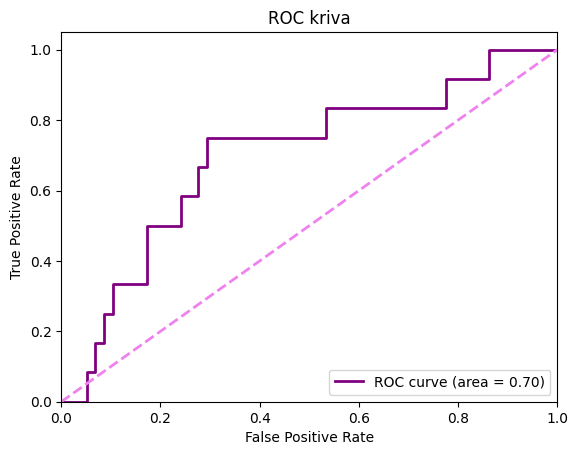

################ METRIKE ZA MODEL Logistic Regression sa optimizacijom parametara ##################
#################################
Accuracy (Tačnost): 0.7714285714285715
#################################
Precision (Preciznost): 0.3333333333333333
#################################
Recall(odziv): 0.3333333333333333
###############################
F1 Score: 0.3333333333333333
ROC AUC: 0.6968390804597702
Confusion Matrix (matrica konfuzije):
[[50  8]
 [ 8  4]]
Classification Report (klasifikacijski izvestaj):
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        58
           1       0.33      0.33      0.33        12

    accuracy                           0.77        70
   macro avg       0.60      0.60      0.60        70
weighted avg       0.77      0.77      0.77        70




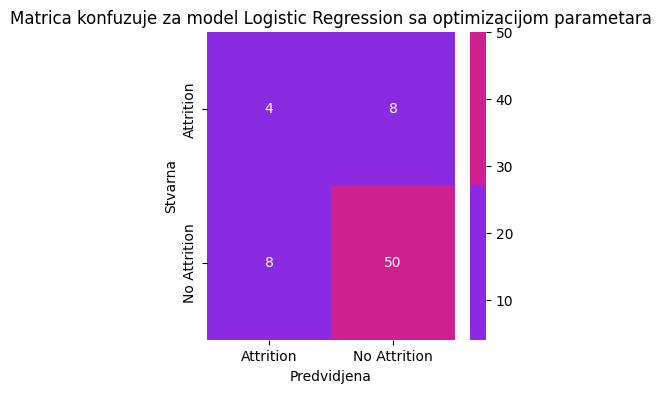

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        58
           1       0.33      0.33      0.33        12

    accuracy                           0.77        70
   macro avg       0.60      0.60      0.60        70
weighted avg       0.77      0.77      0.77        70



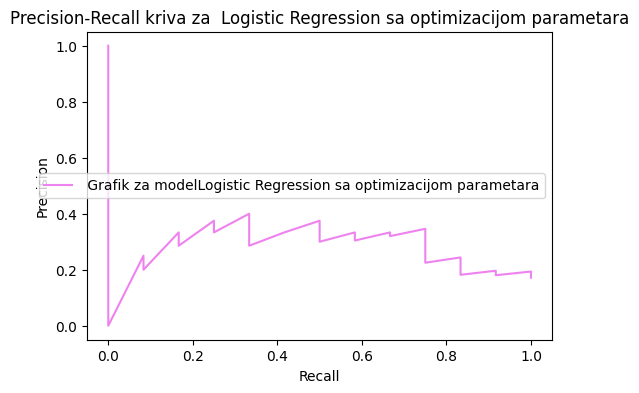

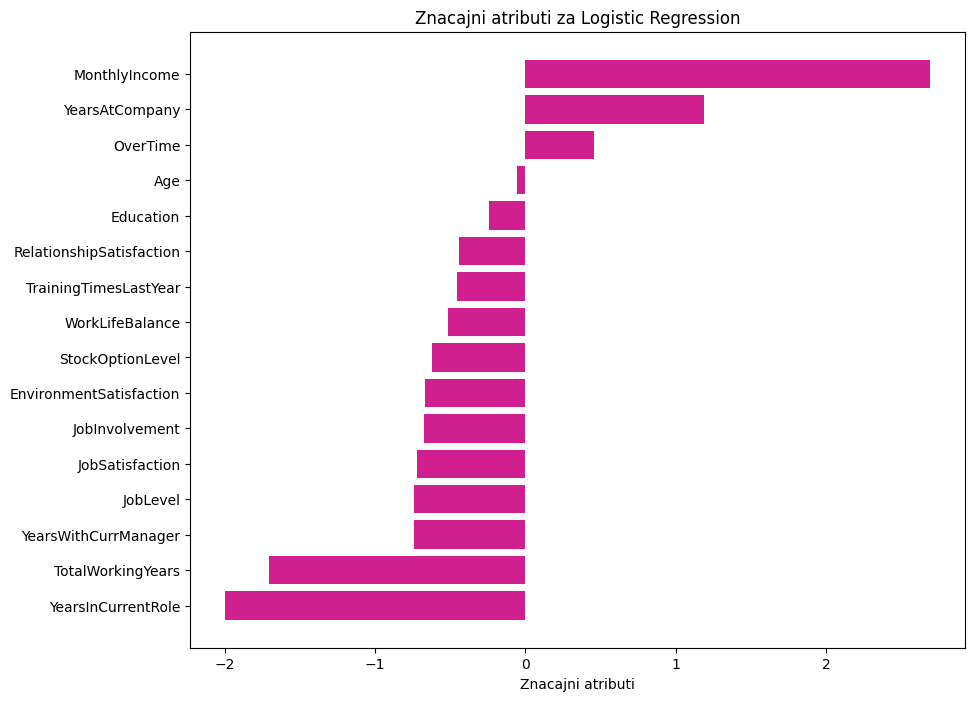

In [129]:
best_params_lr = treniranje_i_tjunovanje(LogisticRegression(), param_grids['Logistic Regression'], "Logistic Regression")

Treniranje modela Decision Tree nakon optimizacije parametara 
Krosvalidacioni scopre:  83.04%
ROC_AUC Score :  72.27%


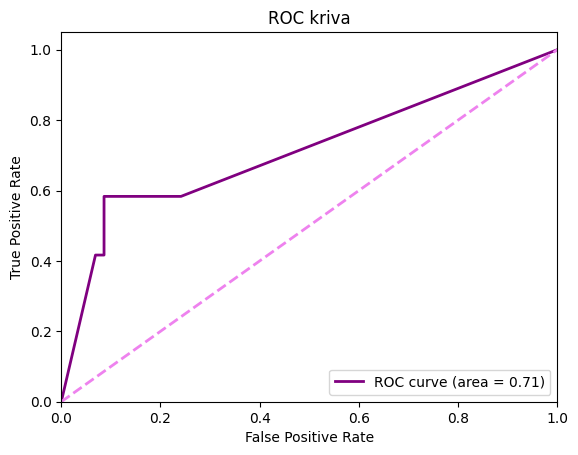

################ METRIKE ZA MODEL Decision Tree sa optimizacijom parametara ##################
#################################
Accuracy (Tačnost): 0.8142857142857143
#################################
Precision (Preciznost): 0.4666666666666667
#################################
Recall(odziv): 0.5833333333333334
###############################
F1 Score: 0.5185185185185186
ROC AUC: 0.7126436781609196
Confusion Matrix (matrica konfuzije):
[[50  8]
 [ 5  7]]
Classification Report (klasifikacijski izvestaj):
              precision    recall  f1-score   support

           0       0.91      0.86      0.88        58
           1       0.47      0.58      0.52        12

    accuracy                           0.81        70
   macro avg       0.69      0.72      0.70        70
weighted avg       0.83      0.81      0.82        70




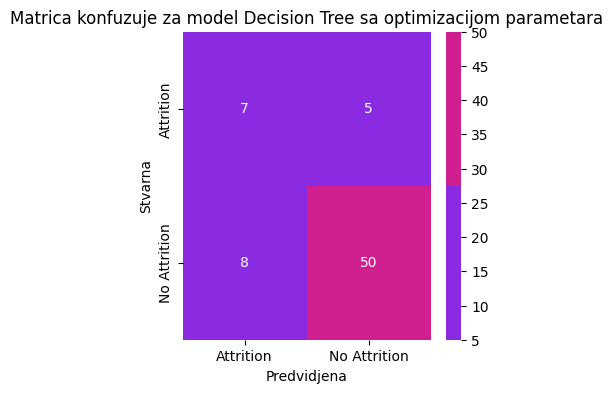

              precision    recall  f1-score   support

           0       0.91      0.86      0.88        58
           1       0.47      0.58      0.52        12

    accuracy                           0.81        70
   macro avg       0.69      0.72      0.70        70
weighted avg       0.83      0.81      0.82        70



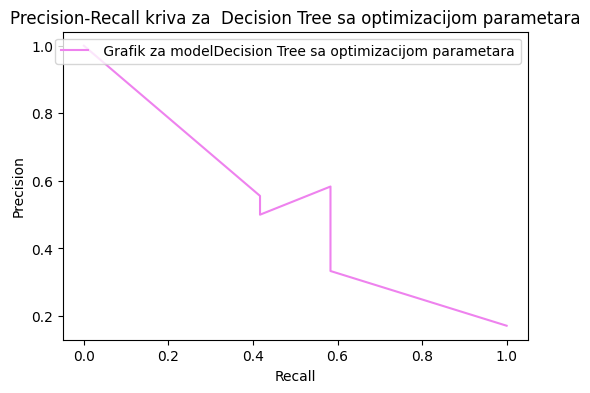

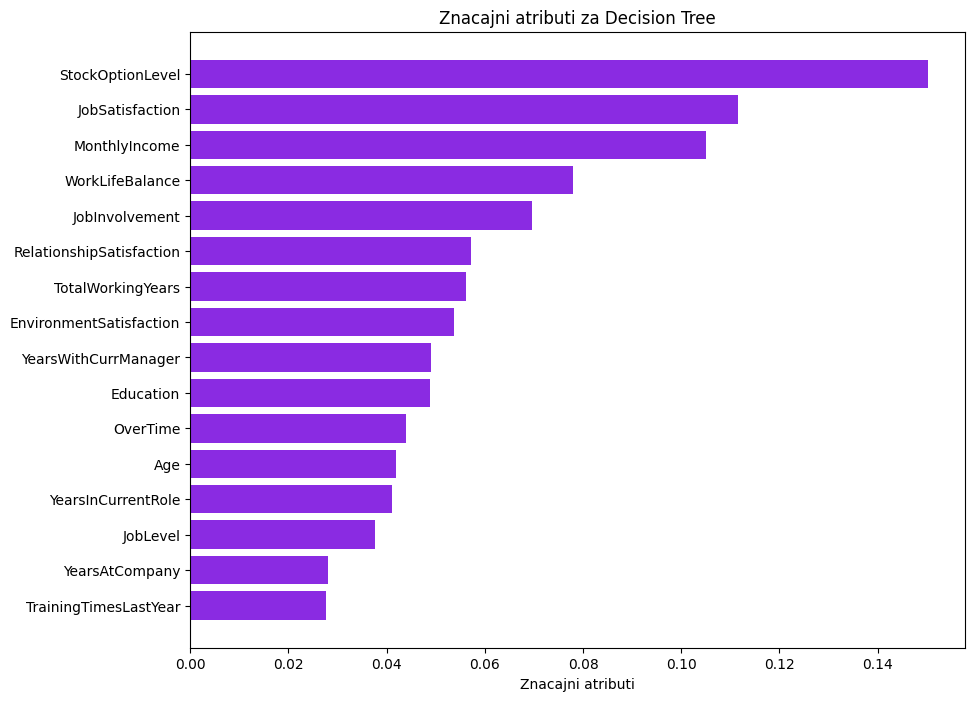

In [130]:
best_params_dt = treniranje_i_tjunovanje(DecisionTreeClassifier(), param_grids['Decision Tree'], "Decision Tree")

Treniranje modela Random Forest nakon optimizacije parametara 
Krosvalidacioni scopre:  95.01%
ROC_AUC Score :  66.52%


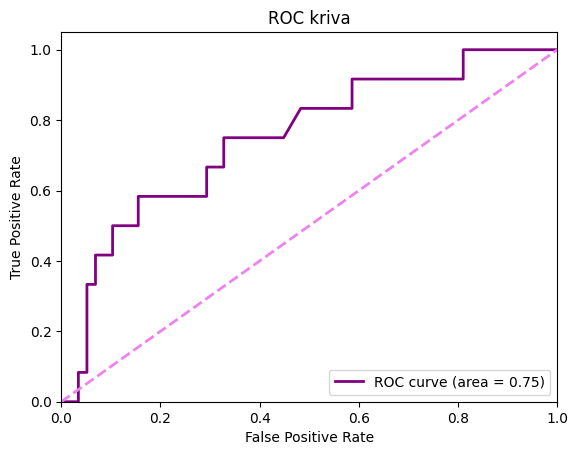

################ METRIKE ZA MODEL Random Forest sa optimizacijom parametara ##################
#################################
Accuracy (Tačnost): 0.8285714285714286
#################################
Precision (Preciznost): 0.5
#################################
Recall(odziv): 0.4166666666666667
###############################
F1 Score: 0.45454545454545453
ROC AUC: 0.75
Confusion Matrix (matrica konfuzije):
[[53  5]
 [ 7  5]]
Classification Report (klasifikacijski izvestaj):
              precision    recall  f1-score   support

           0       0.88      0.91      0.90        58
           1       0.50      0.42      0.45        12

    accuracy                           0.83        70
   macro avg       0.69      0.67      0.68        70
weighted avg       0.82      0.83      0.82        70




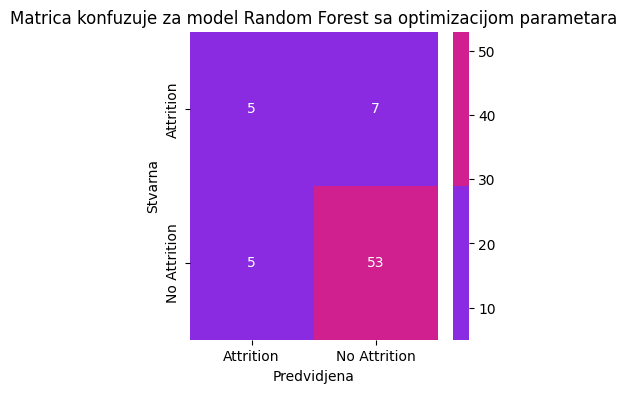

              precision    recall  f1-score   support

           0       0.88      0.91      0.90        58
           1       0.50      0.42      0.45        12

    accuracy                           0.83        70
   macro avg       0.69      0.67      0.68        70
weighted avg       0.82      0.83      0.82        70



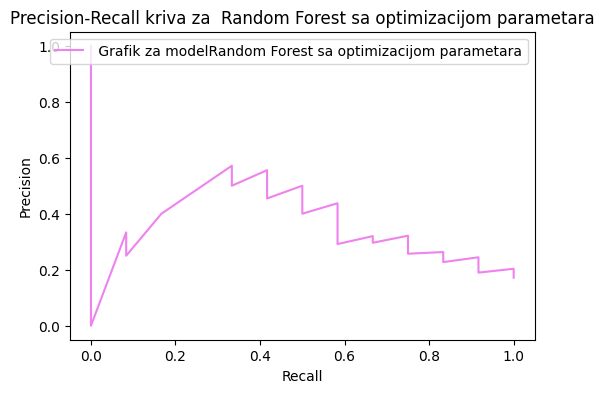

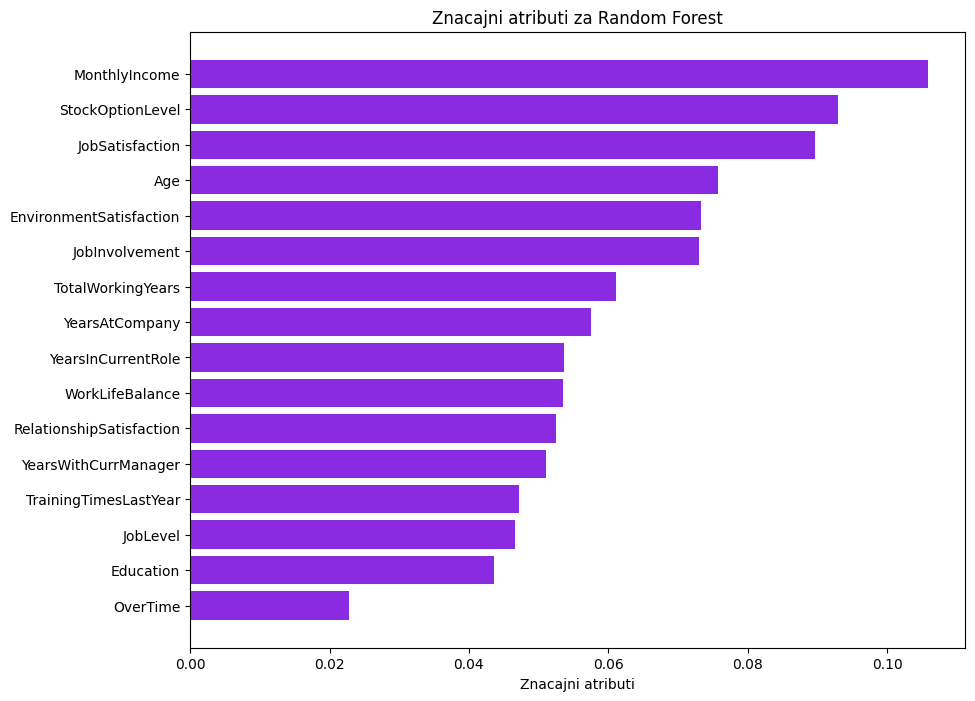

In [131]:
best_params_rf = treniranje_i_tjunovanje(RandomForestClassifier(), param_grids['Random Forest'], "Random Forest")

Treniranje modela Gradient Boosting nakon optimizacije parametara 
Krosvalidacioni scopre:  95.54%
ROC_AUC Score :  71.55%


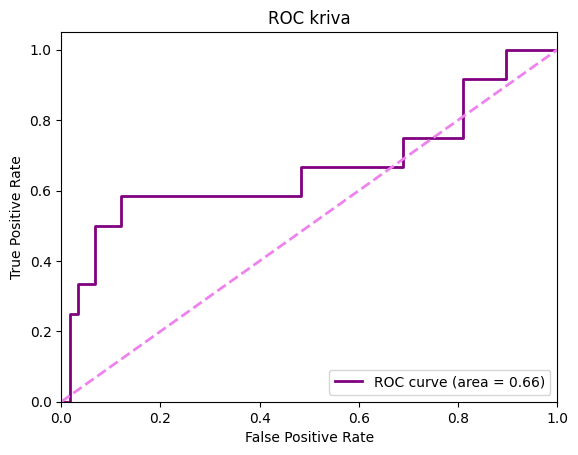

################ METRIKE ZA MODEL Gradient Boosting sa optimizacijom parametara ##################
#################################
Accuracy (Tačnost): 0.8571428571428571
#################################
Precision (Preciznost): 0.6
#################################
Recall(odziv): 0.5
###############################
F1 Score: 0.5454545454545454
ROC AUC: 0.6637931034482758
Confusion Matrix (matrica konfuzije):
[[54  4]
 [ 6  6]]
Classification Report (klasifikacijski izvestaj):
              precision    recall  f1-score   support

           0       0.90      0.93      0.92        58
           1       0.60      0.50      0.55        12

    accuracy                           0.86        70
   macro avg       0.75      0.72      0.73        70
weighted avg       0.85      0.86      0.85        70




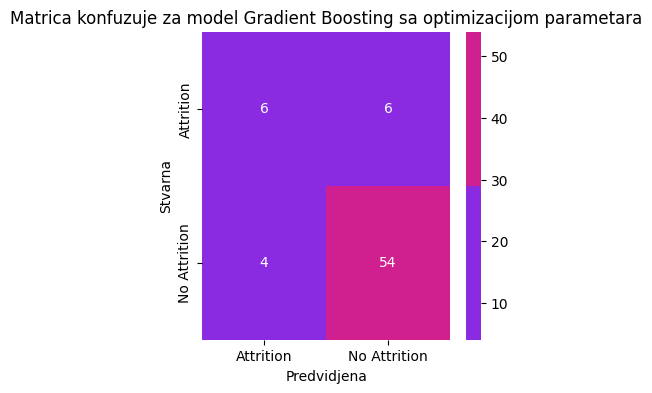

              precision    recall  f1-score   support

           0       0.90      0.93      0.92        58
           1       0.60      0.50      0.55        12

    accuracy                           0.86        70
   macro avg       0.75      0.72      0.73        70
weighted avg       0.85      0.86      0.85        70



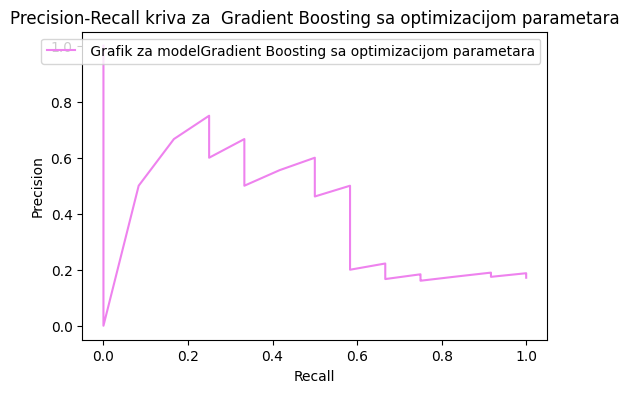

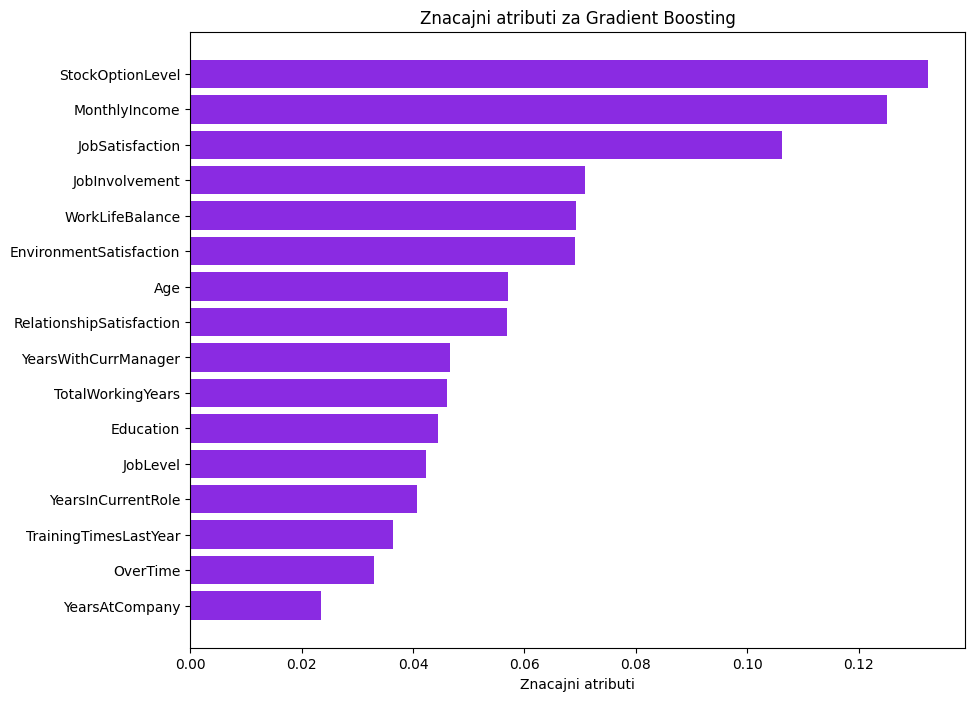

In [132]:
best_params_gb = treniranje_i_tjunovanje(GradientBoostingClassifier(), param_grids['Gradient Boosting'], "Gradient Boosting")


Treniranje modela AdaBoost nakon optimizacije parametara 
Krosvalidacioni scopre:  91.21%
ROC_AUC Score :  58.91%


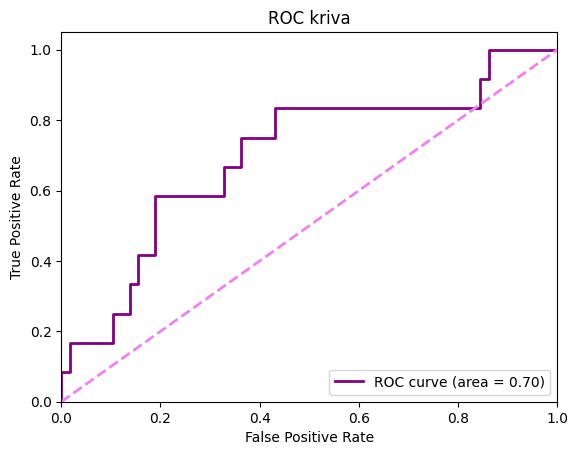

################ METRIKE ZA MODEL AdaBoost sa optimizacijom parametara ##################
#################################
Accuracy (Tačnost): 0.7571428571428571
#################################
Precision (Preciznost): 0.3076923076923077
#################################
Recall(odziv): 0.3333333333333333
###############################
F1 Score: 0.32
ROC AUC: 0.6982758620689655
Confusion Matrix (matrica konfuzije):
[[49  9]
 [ 8  4]]
Classification Report (klasifikacijski izvestaj):
              precision    recall  f1-score   support

           0       0.86      0.84      0.85        58
           1       0.31      0.33      0.32        12

    accuracy                           0.76        70
   macro avg       0.58      0.59      0.59        70
weighted avg       0.77      0.76      0.76        70




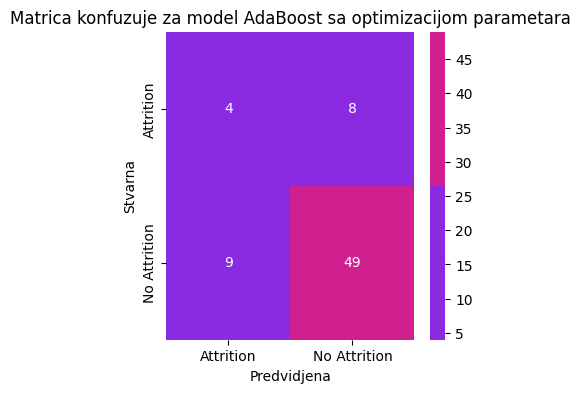

              precision    recall  f1-score   support

           0       0.86      0.84      0.85        58
           1       0.31      0.33      0.32        12

    accuracy                           0.76        70
   macro avg       0.58      0.59      0.59        70
weighted avg       0.77      0.76      0.76        70



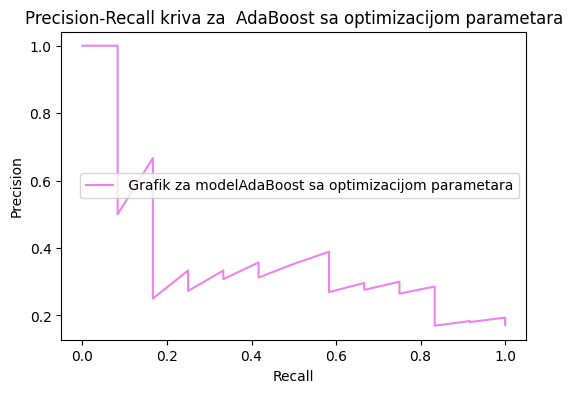

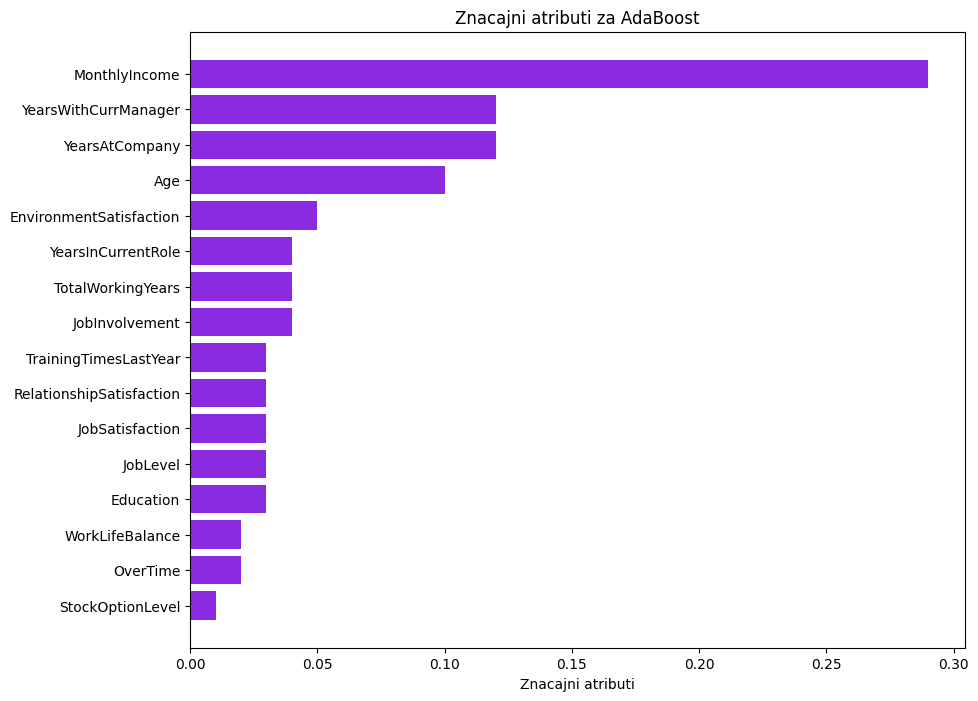

In [133]:
best_params_ab = treniranje_i_tjunovanje(AdaBoostClassifier(), param_grids['AdaBoost'], "AdaBoost")


Treniranje modela Bagging nakon optimizacije parametara 
Krosvalidacioni scopre:  95.38%
ROC_AUC Score :  65.66%


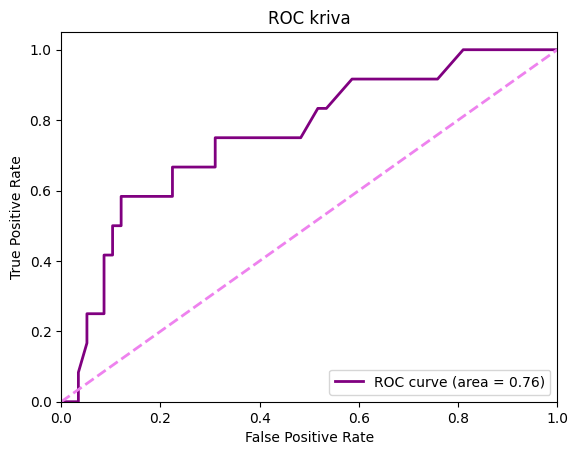

################ METRIKE ZA MODEL Bagging sa optimizacijom parametara ##################
#################################
Accuracy (Tačnost): 0.8142857142857143
#################################
Precision (Preciznost): 0.45454545454545453
#################################
Recall(odziv): 0.4166666666666667
###############################
F1 Score: 0.43478260869565216
ROC AUC: 0.7579022988505747
Confusion Matrix (matrica konfuzije):
[[52  6]
 [ 7  5]]
Classification Report (klasifikacijski izvestaj):
              precision    recall  f1-score   support

           0       0.88      0.90      0.89        58
           1       0.45      0.42      0.43        12

    accuracy                           0.81        70
   macro avg       0.67      0.66      0.66        70
weighted avg       0.81      0.81      0.81        70




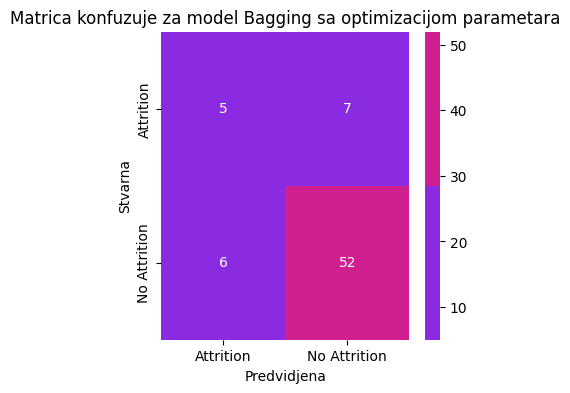

              precision    recall  f1-score   support

           0       0.88      0.90      0.89        58
           1       0.45      0.42      0.43        12

    accuracy                           0.81        70
   macro avg       0.67      0.66      0.66        70
weighted avg       0.81      0.81      0.81        70



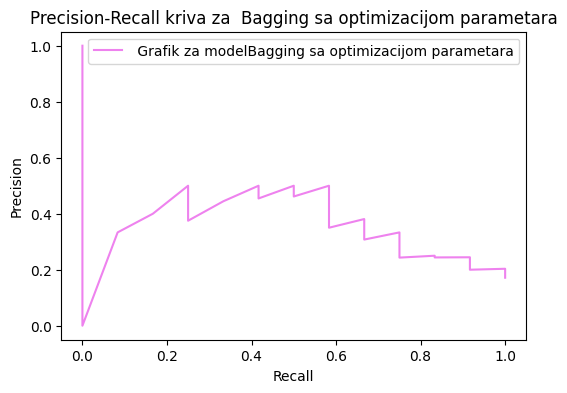

In [134]:
best_params_bg = treniranje_i_tjunovanje(BaggingClassifier(), param_grids['Bagging'], "Bagging")


c:\Users\andjelami\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\andjelami\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\andjelami\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\andjelami\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\andjelami\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `u

Treniranje modela XGBoost nakon optimizacije parametara 


c:\Users\andjelami\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\andjelami\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\andjelami\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\andjelami\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\andjelami\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `u

Krosvalidacioni scopre:  95.11%
ROC_AUC Score :  69.83%


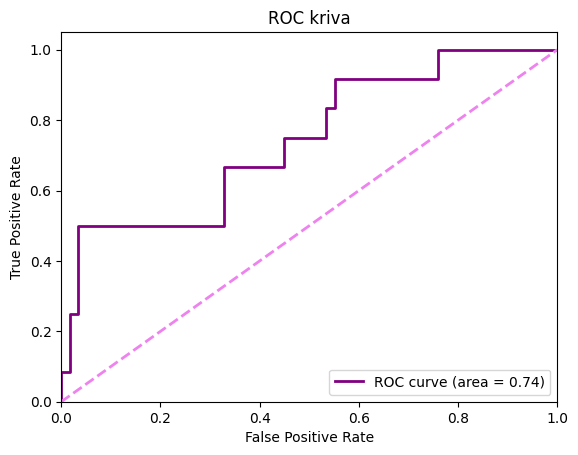

################ METRIKE ZA MODEL XGBoost sa optimizacijom parametara ##################
#################################
Accuracy (Tačnost): 0.8285714285714286
#################################
Precision (Preciznost): 0.5
#################################
Recall(odziv): 0.5
###############################
F1 Score: 0.5
ROC AUC: 0.742816091954023
Confusion Matrix (matrica konfuzije):
[[52  6]
 [ 6  6]]
Classification Report (klasifikacijski izvestaj):
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        58
           1       0.50      0.50      0.50        12

    accuracy                           0.83        70
   macro avg       0.70      0.70      0.70        70
weighted avg       0.83      0.83      0.83        70




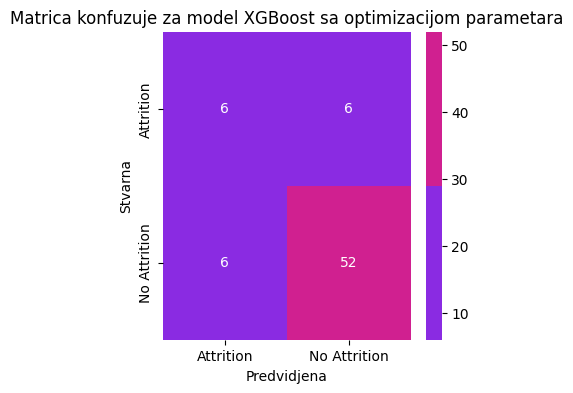

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        58
           1       0.50      0.50      0.50        12

    accuracy                           0.83        70
   macro avg       0.70      0.70      0.70        70
weighted avg       0.83      0.83      0.83        70



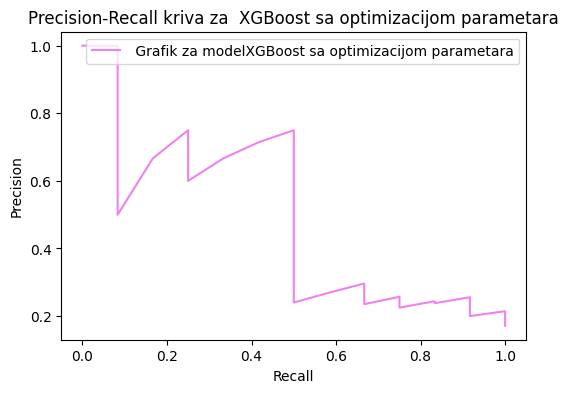

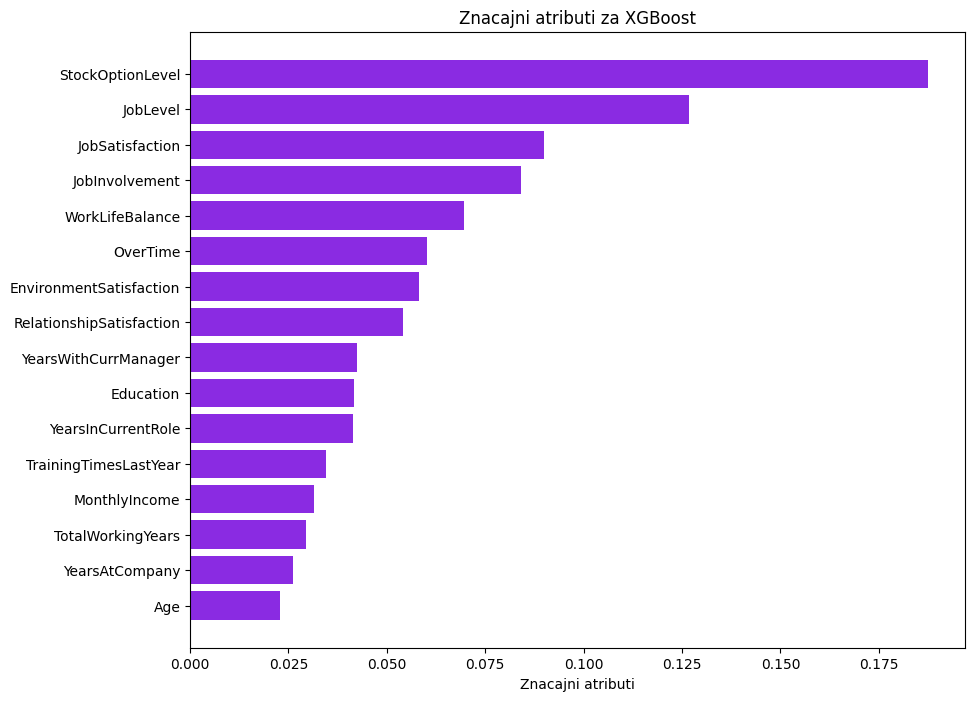

In [135]:
best_params_xgb = treniranje_i_tjunovanje(xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'), param_grids['XGBoost'], "XGBoost")


Treniranje modela LightGBM nakon optimizacije parametara 
[LightGBM] [Info] Number of positive: 748, number of negative: 880
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000291 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 439
[LightGBM] [Info] Number of data points in the train set: 1628, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.459459 -> initscore=-0.162519
[LightGBM] [Info] Start training from score -0.162519
[LightGBM] [Info] Number of positive: 748, number of negative: 880
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000337 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 442
[LightGBM] [Info] Number of data points in the train set: 1628, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.459459 -> initscore=-0.162519
[LightGBM] [Info] St

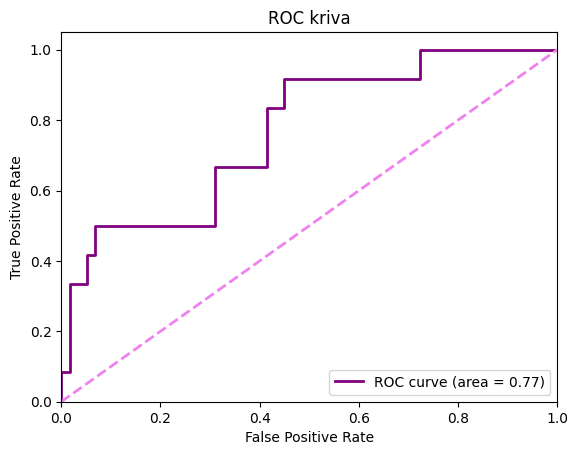

################ METRIKE ZA MODEL LightGBM sa optimizacijom parametara ##################
#################################
Accuracy (Tačnost): 0.8285714285714286
#################################
Precision (Preciznost): 0.5
#################################
Recall(odziv): 0.5
###############################
F1 Score: 0.5
ROC AUC: 0.7672413793103448
Confusion Matrix (matrica konfuzije):
[[52  6]
 [ 6  6]]
Classification Report (klasifikacijski izvestaj):
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        58
           1       0.50      0.50      0.50        12

    accuracy                           0.83        70
   macro avg       0.70      0.70      0.70        70
weighted avg       0.83      0.83      0.83        70




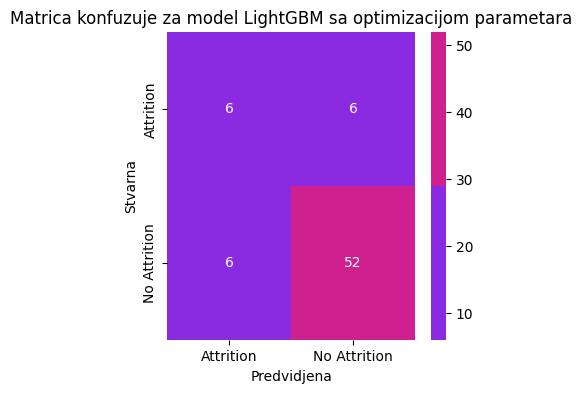

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        58
           1       0.50      0.50      0.50        12

    accuracy                           0.83        70
   macro avg       0.70      0.70      0.70        70
weighted avg       0.83      0.83      0.83        70



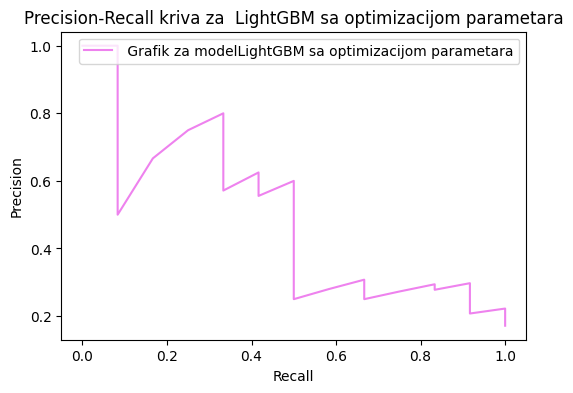

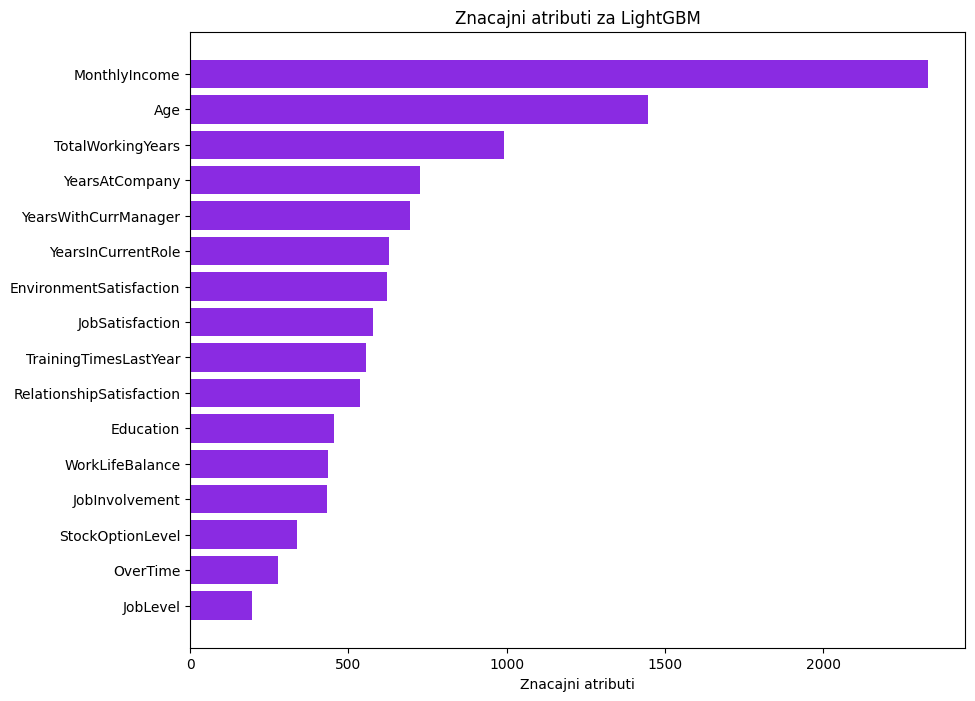

In [136]:
best_params_lgb = treniranje_i_tjunovanje(lgb.LGBMClassifier(), param_grids['LightGBM'], "LightGBM")


Treniranje modela CatBoost nakon optimizacije parametara 
Krosvalidacioni scopre:  95.64%
ROC_AUC Score :  70.69%


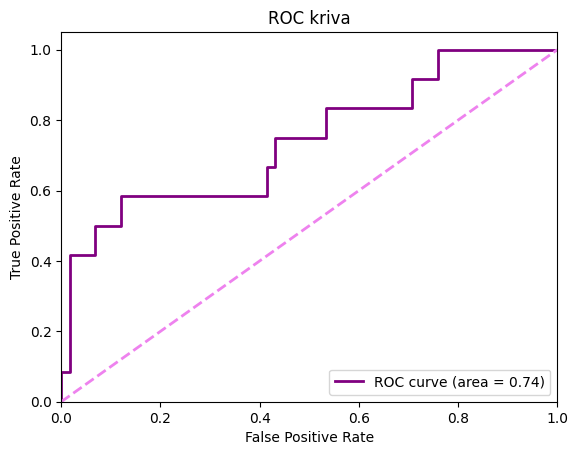

################ METRIKE ZA MODEL CatBoost sa optimizacijom parametara ##################
#################################
Accuracy (Tačnost): 0.8428571428571429
#################################
Precision (Preciznost): 0.5454545454545454
#################################
Recall(odziv): 0.5
###############################
F1 Score: 0.5217391304347826
ROC AUC: 0.7413793103448276
Confusion Matrix (matrica konfuzije):
[[53  5]
 [ 6  6]]
Classification Report (klasifikacijski izvestaj):
              precision    recall  f1-score   support

           0       0.90      0.91      0.91        58
           1       0.55      0.50      0.52        12

    accuracy                           0.84        70
   macro avg       0.72      0.71      0.71        70
weighted avg       0.84      0.84      0.84        70




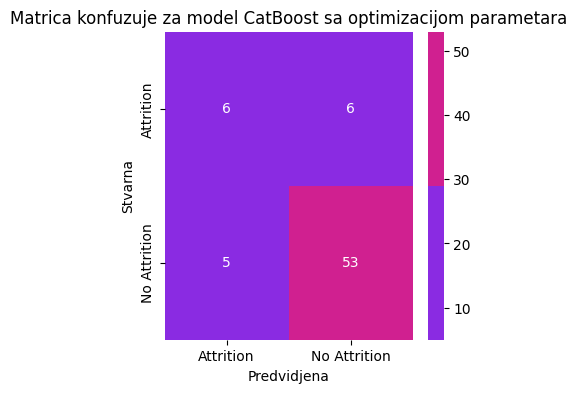

              precision    recall  f1-score   support

           0       0.90      0.91      0.91        58
           1       0.55      0.50      0.52        12

    accuracy                           0.84        70
   macro avg       0.72      0.71      0.71        70
weighted avg       0.84      0.84      0.84        70



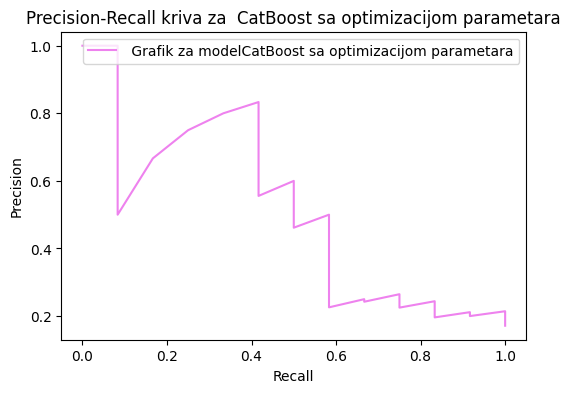

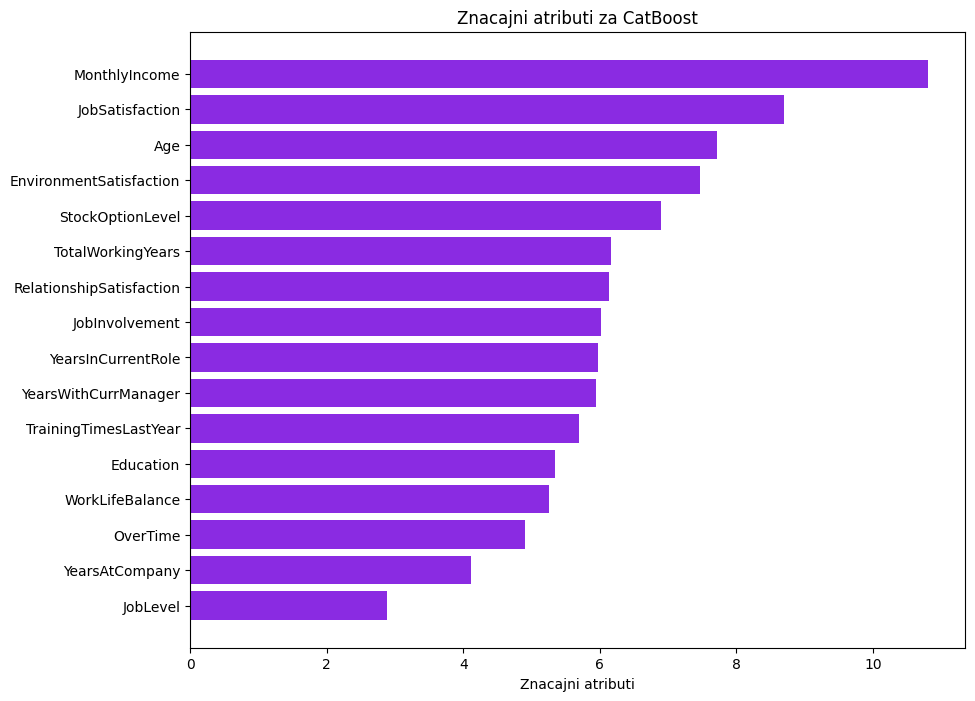

In [137]:
best_params_cb = treniranje_i_tjunovanje(cb.CatBoostClassifier(silent=True), param_grids['CatBoost'], "CatBoost")


In [138]:
#best_params_svc = treniranje_i_tjunovanje(SVC(probability=True), param_grids['SVC'], "Support Vector Machine")

Treniranje modela Naive Bayes nakon optimizacije parametara 
Krosvalidacioni scopre:  82.79%
ROC_AUC Score :  62.79%


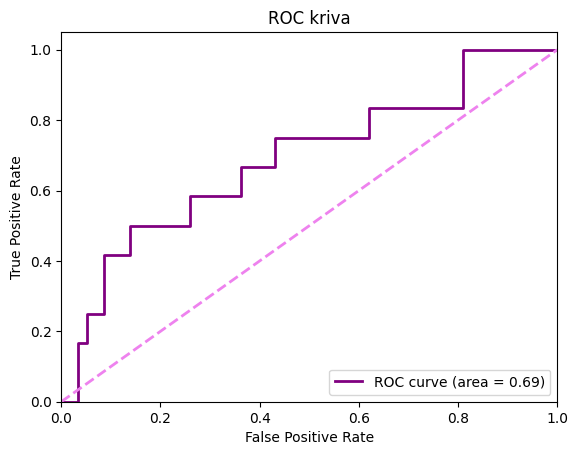

################ METRIKE ZA MODEL Naive Bayes sa optimizacijom parametara ##################
#################################
Accuracy (Tačnost): 0.6571428571428571
#################################
Precision (Preciznost): 0.2692307692307692
#################################
Recall(odziv): 0.5833333333333334
###############################
F1 Score: 0.3684210526315789
ROC AUC: 0.6896551724137931
Confusion Matrix (matrica konfuzije):
[[39 19]
 [ 5  7]]
Classification Report (klasifikacijski izvestaj):
              precision    recall  f1-score   support

           0       0.89      0.67      0.76        58
           1       0.27      0.58      0.37        12

    accuracy                           0.66        70
   macro avg       0.58      0.63      0.57        70
weighted avg       0.78      0.66      0.70        70




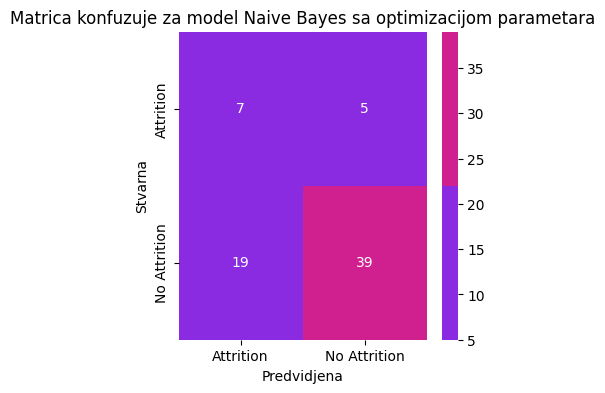

              precision    recall  f1-score   support

           0       0.89      0.67      0.76        58
           1       0.27      0.58      0.37        12

    accuracy                           0.66        70
   macro avg       0.58      0.63      0.57        70
weighted avg       0.78      0.66      0.70        70



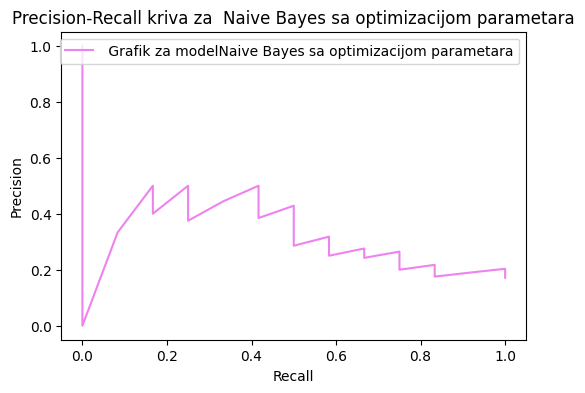

In [139]:
best_params_NB = treniranje_i_tjunovanje(GaussianNB(), param_grids['GaussianNB'], "Naive Bayes")

In [140]:
print("NAJBOLJI PARAMETRI ZA Logistic Regression:", best_params_lr)
print("NAJBOLJI PARAMETRI ZA  Decision Tree:", best_params_dt)
print("NAJBOLJI PARAMETRI ZA  Random Forest:", best_params_rf)
print("NAJBOLJI PARAMETRI ZA Gradient Boosting:", best_params_gb)
print("NAJBOLJI PARAMETRI ZA  AdaBoost:", best_params_ab)
print("NAJBOLJI PARAMETRI ZA  Bagging:", best_params_bg)
print("NAJBOLJI PARAMETRI ZA  XGBoost:", best_params_xgb)
print("NAJBOLJI PARAMETRI ZA  LightGBM:", best_params_lgb)
print("NAJBOLJI PARAMETRI ZA  CatBoost:", best_params_cb)
#print("NAJBOLJI PARAMETRI ZA  Support Vector Machine:", best_params_svc)
print("NAJBOLJI PARAMETRI ZA Naive Bayes:", best_params_NB)

NAJBOLJI PARAMETRI ZA Logistic Regression: {'C': 100, 'solver': 'lbfgs'}
NAJBOLJI PARAMETRI ZA  Decision Tree: {'max_depth': 40, 'min_samples_split': 10}
NAJBOLJI PARAMETRI ZA  Random Forest: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
NAJBOLJI PARAMETRI ZA Gradient Boosting: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200}
NAJBOLJI PARAMETRI ZA  AdaBoost: {'learning_rate': 1, 'n_estimators': 100}
NAJBOLJI PARAMETRI ZA  Bagging: {'max_features': 0.5, 'max_samples': 1.0, 'n_estimators': 100}
NAJBOLJI PARAMETRI ZA  XGBoost: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200}
NAJBOLJI PARAMETRI ZA  LightGBM: {'learning_rate': 0.2, 'n_estimators': 200, 'num_leaves': 62}
NAJBOLJI PARAMETRI ZA  CatBoost: {'depth': 7, 'iterations': 300, 'learning_rate': 0.2}
NAJBOLJI PARAMETRI ZA Naive Bayes: {'var_smoothing': 1e-09}
